# Import Packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import preprocessing
from pylab import *
from __future__ import unicode_literals
import pylab as pl
import numpy as np
 
from matplotlib import rc
from scipy.optimize import curve_fit
 
rc('text', usetex=True)
pl.rcParams['text.latex.preamble'] = [
    r'\usepackage{tgheros}',    # helvetica font
    r'\usepackage{sansmath}',   # math-font matching  helvetica
    r'\sansmath'                # actually tell tex to use it!
    r'\usepackage{siunitx}',    # micro symbols
    r'\sisetup{detect-all}',    # force siunitx to use the fonts
]  

# Color Scheme Tableau10

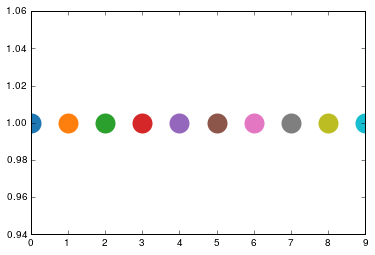

In [3]:
# These are the "Tableau 20" colors as RGB.    
tableau10 = [(31,119,180),(255,127,14),(44,160,44),(214,39,40),(148,103,189),(140,86,75),(227,119,194),(127,127,127),(188,189,34),(23,190,207)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau10)):    
    r, g, b = tableau10[i]    
    tableau10[i] = np.array([r / 255., g / 255., b / 255.])   
    
###--- Set ticks ---###
plt.xticks(range(0,11), [str(x) for x in range(0,11)], fontsize=10)     

for i in range(len(tableau10)):
    plt.plot(i,1,markersize=20,marker="o",markeredgewidth=0.0,lw=2.,linestyle='-', color=tableau10[i])

# Parameters of Simulations
## Units

Unit Length: d (diameter of a particle)

Unit time:$\frac{d^2}{D}$

Unit energy: $k_{\rm{B}}T$

Number of particles: 1652

Side of simulation box: 82

Time step: 0.000002

Interval time steps to take trajectory data:

# Fig. 1. (a). Detailed replication scheme and interaction matrix

# Fig. 1. (b). Interaction Matrix

# Fig. 2. (a). Snapshot from simulation

``file name'' = /Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/trajNc3N1652L82MM10CM14Run2.dat

``time step'' = 997

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


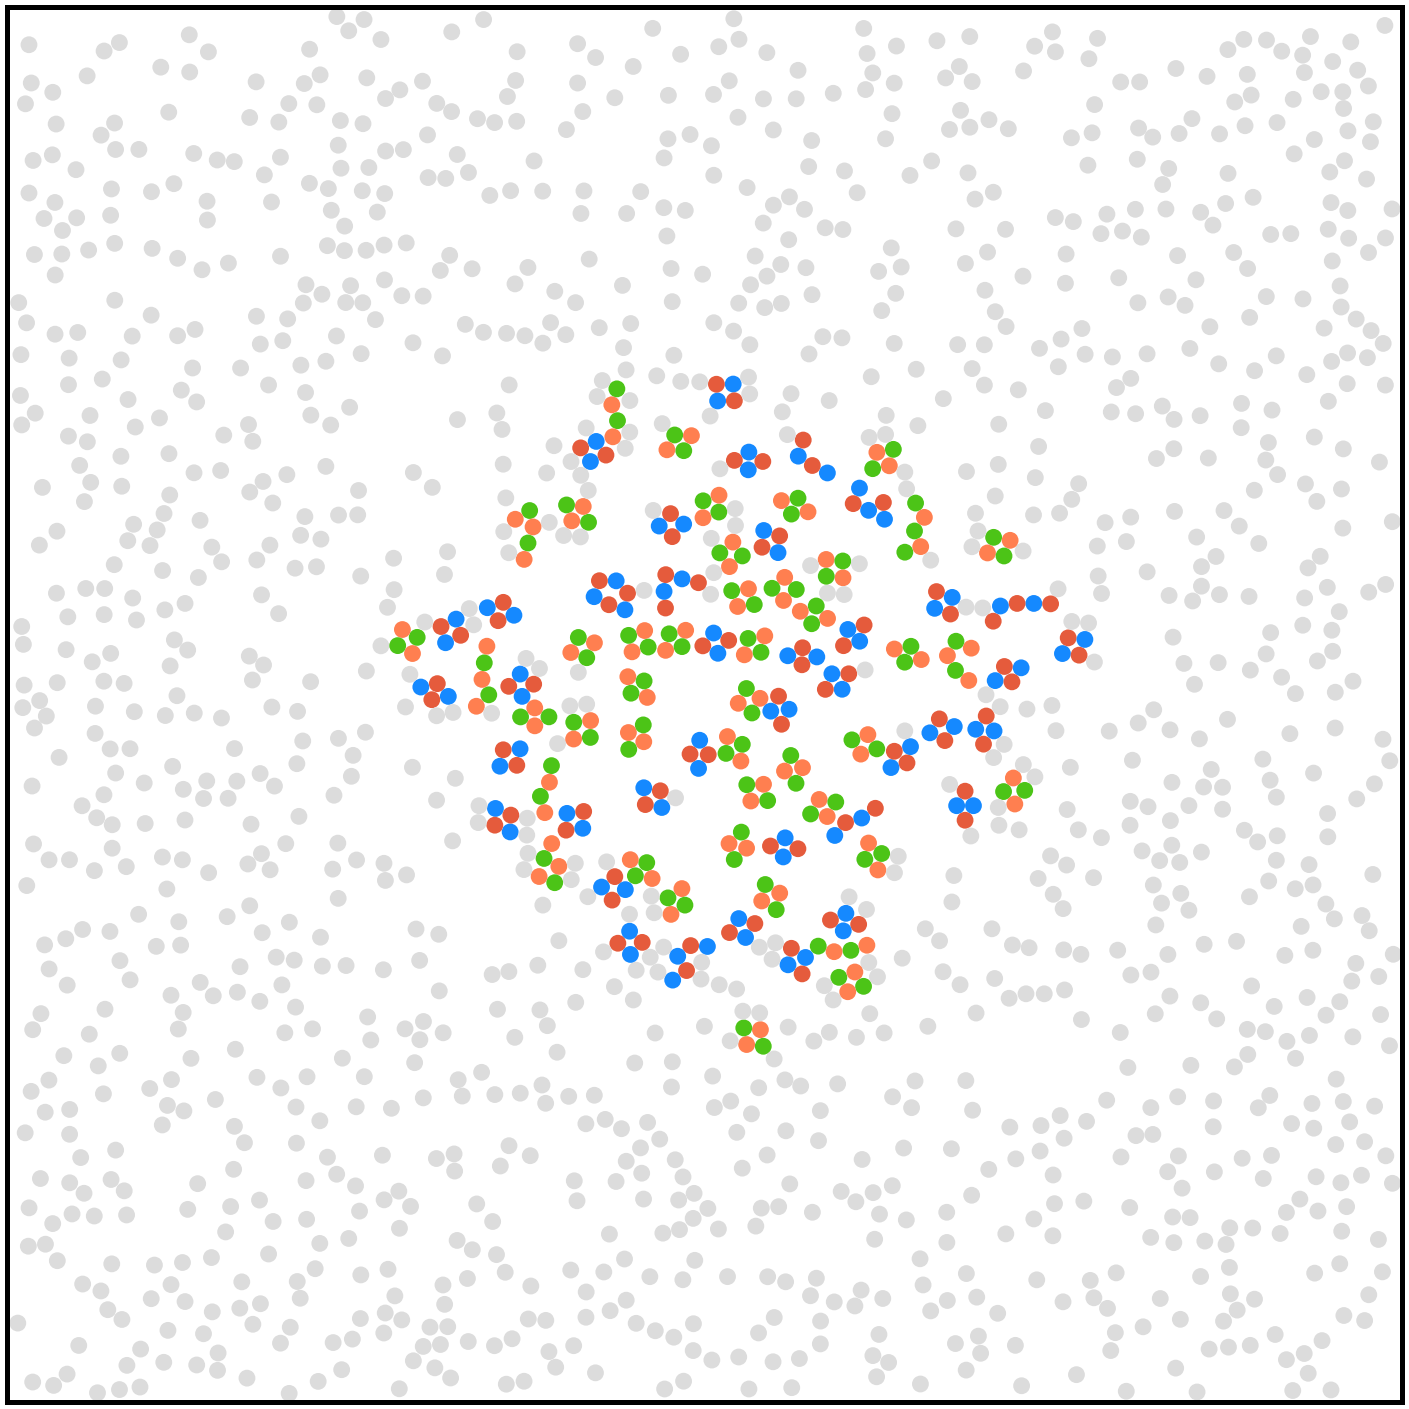

In [9]:
#trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Mutation/Mutation/trajNc3N1652L82MM10CM14Run2.dat'
#trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Mutation/Mutation_Load/Mu_trajNc3N1652L82MM10CM14Run4.dat'
trajfile = '/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/trajNc3N1652L82MM10CM14Run2.dat'
#trajfile = '/Users/hidenori/Research/trace_generation/trajNc3N1652L82MM10CM14Run0.dat'
N=1652
      
for time in np.arange(997,998,1): 
###-------------- IMPORT DATA FILE ------------------### 
    data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(8))

    data.columns=['PIN','SV','CA0','CA1','CA2','CIN','x','y']
   
    data['CIN'][data['CIN']>=0]=1



    figure(figsize=(25,25))
    ax=subplot(aspect='equal')
    X = data['x']
    Y = data['y']
    area = np.pi * (90)
    # Set axis   
    ax = plt.subplot(111)   

    # Set line width of axes
    ax.spines["top"].set_linewidth(5)    
    ax.spines["bottom"].set_linewidth(5)    
    ax.spines["right"].set_linewidth(5)    
    ax.spines["left"].set_linewidth(5) 
    plt.axes()
    plt.scatter(X, Y, s=area, c=(data['SV']*(data['CIN'].replace(-1,0))).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#1589FF').replace(3,'#FF7F50').replace(4,'#4CC417'),edgecolor='none', alpha= 1.0) 
    plt.axis('tight')
    plt.xlim(-41.5, 41.5)
    plt.xticks(())
    plt.ylim(-41.5, 41.5)
    plt.yticks(())

    #plt.savefig('/Users/hidenori/Desktop/ImageReplication/Image'+str(time)+'.png', bbox_inches='tight',format='png')
    #plt.close('all')

# Fig. 2. (b). Examples of frequent replication pathways

# Fig. 2. (c). Population of 4-mers, 5-mers and 6-mers as a function of time

``file name'' = /Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/NumClNc3N1652L82MM10CM14Run2.dat

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1082: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markeredgecolor != ec:


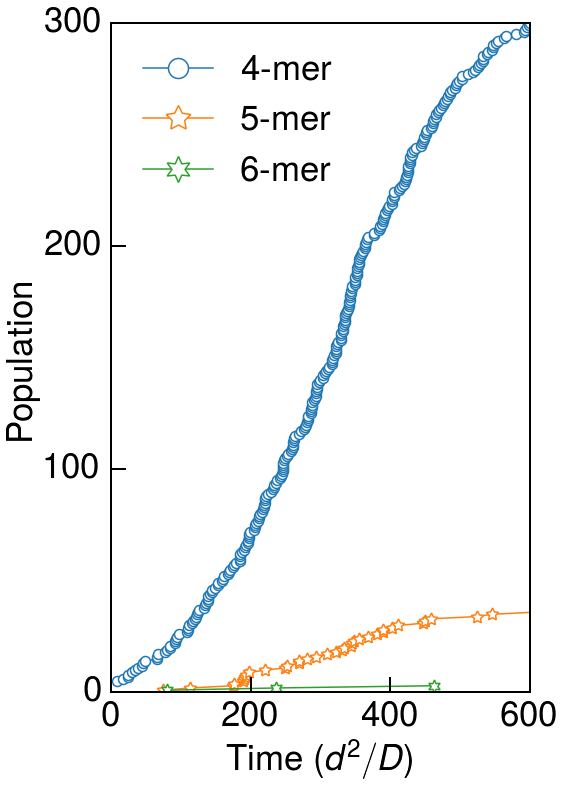

In [12]:
# Set size of a figure
plt.figure(figsize=(7.5, 12)) 
 
# Set axis   
ax = plt.subplot(111)   
ax.spines["top"].set_linewidth(2)    
ax.spines["bottom"].set_linewidth(2)    
ax.spines["right"].set_linewidth(2)    
ax.spines["left"].set_linewidth(2) 

# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot. 
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.yticks(range(0, 1001, 100), [str(x) for x in range(0, 1001, 100)], fontsize=35)    
plt.xticks(range(0,601,200),[str(x) for x in np.arange(0,601,200) ], fontsize=35) 
 
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
labelbottom="on", left="on", right="off", labelleft="on",direction='in',length=15,width=2,pad=8,labelsize=35)

table = pd.read_table('/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/NumClNc3N1652L82MM10CM14Run2.dat', sep='\t\t', index_col=1, header=None,names=['time','NPIC','Parents'],lineterminator='\n')
hi=table.groupby(['NPIC'])
table['time']=table['time']*0.000002 
plt.plot( pd.DataFrame(hi.get_group(4)['time']), DataFrame( np.arange(5,5+len( pd.DataFrame( hi.get_group(4)['time'] )) )) , marker='o',markersize=10, markeredgewidth=1.5,markeredgecolor=tableau10[0] ,lw=1.5,linestyle='-',markerfacecolor="w",color=tableau10[0],alpha=1.0,label= r"4-mer")   #$E_{\rm{bm}}/T$ = "+str(round(7*j/10,3)))
plt.plot( pd.DataFrame(hi.get_group(5)['time']), DataFrame( np.arange(1,1+len( pd.DataFrame( hi.get_group(5)['time'] )) )) ,marker=(5, 1),markersize=13, markeredgewidth=1.5 ,markeredgecolor=tableau10[1],lw=1.5,linestyle='-',markerfacecolor="w", color=tableau10[1] ,alpha=1.0,label=  r"5-mer")#   $E_{\rm{bm}}/T$ = "+str(round(7*j/10,3)))
plt.plot( pd.DataFrame(hi.get_group(6)['time']) , DataFrame(np.arange(1,1+len(pd.DataFrame(hi.get_group(6)['time'])) )) ,marker=(6,1),markersize=13, markeredgewidth=1.5 ,color=tableau10[2] ,lw=1.5,linestyle='-',markerfacecolor="w", markeredgecolor=tableau10[2],label=  r"6-mer")

plt.xlabel(r'Time ($d^2/D$)',fontsize=35)
plt.ylabel('Population',fontsize=35)
plt.xlim(0,600)
plt.ylim(0,300)
plt.legend(prop={'size':35},loc=2,markerscale=2, numpoints=1).get_frame().set_linewidth(0.0)
#plt.savefig('/Users/hidenori/Google Drive/Research/Replication/Figures/figure_2a.pdf', bbox_inches='tight',format='pdf')

# Fig. 3. (a)
``file name'' = /Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/NumClNc3N1652L82MM10CM14Run[0-9].dat

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:
//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1082: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markeredgecolor != ec:


[ 79  85  91  97 104 112 120 128 138 147 158 169 181 194 208 223 239 257
 275 295 316 338 363 389 416]
[  1.26351615e-03   1.23450896e+01]


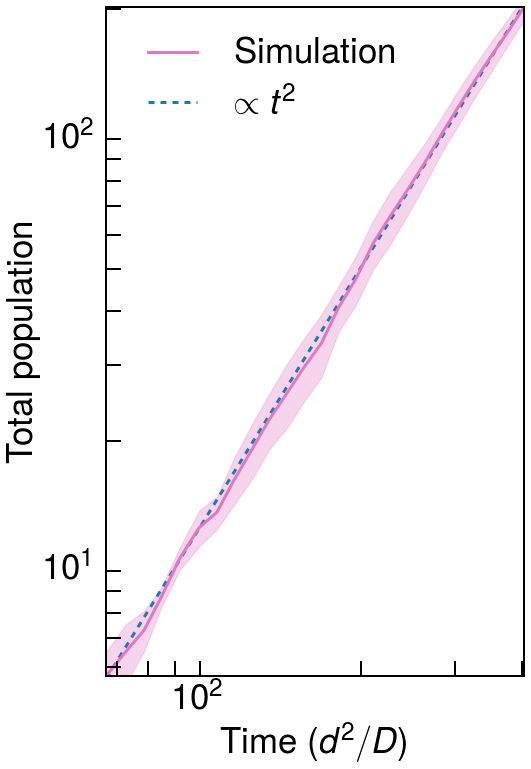

In [4]:
# total number of clusters at time "t" for ensemble "j"
NumCl=np.zeros([10,600])
i=0
# interate through the 10 independent ensembles 
for j in [0,1,2,3,4,5,6,7,8,9]:
    table = pd.read_table('/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/NumClNc3N1652L82MM10CM14Run'+str(j)+'.dat', sep='\t\t', index_col=1, header=None,names=['time','NPIC','Parents'],lineterminator='\n')
    # initially there is 5 clusters
    NCl = 5
    # We use simulation time
    table['time']=0.000002*table['time']
    # from 0 to 600, check number of clusters
    # If 
    for t in range(0, 600 ):
        # Shifted origin of time by (table['time'][10]-100)
        if t < table['time'][NCl+1] - (table['time'][10]-100) :
            NumCl[j][t] = NCl
        else:
            NCl+=1
            NumCl[j][t] = NCl


def func(x, a, b):
     return a*(x-b)**2
    
AveNumCl=np.average(NumCl, axis=0)

xdata = (10**np.arange(1.9,2.65,0.03)).astype(int) 
print(xdata)
ydata = AveNumCl[ xdata ]

popt, pcov = curve_fit(func, xdata, ydata)






# Set size of a figure
plt.figure(figsize=(7.5, 12))
ax = plt.subplot(111)   

# Set line width of axes
ax.spines["top"].set_linewidth(2)    
ax.spines["bottom"].set_linewidth(2)    
ax.spines["right"].set_linewidth(2)    
ax.spines["left"].set_linewidth(2) 

plt.tick_params(axis="both", which="both", bottom="on", top="off",    
labelbottom="on", left="on", right="off", labelleft="on",direction='in',length=15,width=2,pad=8,labelsize=35)

p1, = plt.loglog(np.linspace(0,600,100)-popt[1],func( np.linspace(0,600,100) ,popt[0],popt[1]),lw=3.0,linestyle='--',color=tableau10[0],label=  r"$\propto t^2$")
p2, = plt.loglog(xdata-popt[1],ydata,'ro' , marker='o',markersize=0, markeredgewidth=2, markerfacecolor=tableau10[6], markeredgecolor=tableau10[6] ,color=tableau10[6],lw=3,linestyle='-',label=  "Simulation")
ax.fill_between(xdata-popt[1], ydata + NumCl.std(axis=0)[ xdata ], ydata -  NumCl.std(axis=0)[ xdata ],color=tableau10[6], facecolor=tableau10[6], alpha=0.3)

print( popt )

plt.xlim(xdata.min()-popt[1],xdata.max()-popt[1])
plt.ylim(ydata.min(),ydata.max())
plt.xlabel(r'Time ($d^2/D$)',fontsize=35)
plt.ylabel('Total population',fontsize=35)
plt.legend([p2,p1],["Simulation",r"$\propto t^2$"],prop={'size':35},loc=2,markerscale=2, numpoints=2).get_frame().set_alpha(0.0)
#plt.savefig('/Users/hidenori/Google Drive/Research/Replication/Figures/figure_4/figure_4a.pdf', bbox_inches='tight',format='pdf')

# Fig. 3. (b)
``file name'' = /Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/trajNc3N1652L82MM10CM14Run[0-9].dat

``file name'' = /Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/NumClNc3N1652L82MM10CM14Run[0-9].dat

In [10]:
Cluster=np.zeros([10,5000,59])
# define function for periodic boundary condition
def PB_Data(x,L):
    return x-((x/(2*L)).round(0))*2*L

# half length of a box
L=41.
COM_Cluster = np.zeros(2)
# total number of particles
N=1652
for i in range(10):
    # a file to look at
    trajfile =  '/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/trajNc3N1652L82MM10CM14Run'+str(i)+'.dat'
    table = pd.read_table('/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/NumClNc3N1652L82MM10CM14Run'+str(i)+'.dat', sep='\t\t', index_col=1, header=None,names=['time','NPIC','Parents'],lineterminator='\n')
    # Calculate the length of a file
    with open(trajfile) as f:
        len_trajfile = int(sum(1 for _ in f)/(N+2))
    # time step we are interested in
    for time in range( int(table['time'][10]/10**5), int(table['time'][10]/10**5)+2700, 100):
        data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(8))
        data.columns=['PIN','SV','CA0','CA1','CA2','CIN','x','y']
        # Calculate center of mass of cluster
        Cluster_configuration=data.groupby(['CIN']).mean()
        # Calculate center of mass considering periodic boundary condition
        COM_Cluster=[ ( COM_Cluster[0] + PB_Data(Cluster_configuration['x'].iloc[1:] - COM_Cluster[0],L)).mean(), (COM_Cluster[1]+PB_Data(Cluster_configuration['y'].iloc[1:]-COM_Cluster[1],L)).mean()]
        #print( COM_Cluster )


        Cluster_radial_dist=sqrt(( PB_Data(Cluster_configuration['x'].iloc[1:]-COM_Cluster[0],L) )**2+( PB_Data(Cluster_configuration['y'].iloc[1:]-COM_Cluster[1],L) )**2).round(0)
        Cluster_radial_hist=Cluster_radial_dist.value_counts()


        for j in Cluster_radial_hist.index:
            if j!= 0:
                Cluster[i][time-int(table['time'][10]/10**5)][j]= float(Cluster_radial_hist[j])/( np.pi*( (float(j)+0.5)**2 - (float(j)-0.5)**2 ) )
            elif j==0:
                Cluster[i][time-int(table['time'][10]/10**5)][j]= float(Cluster_radial_hist[j])/( np.pi*( (float(j)+0.5)**2 ) )

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:35: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:37: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1.60187969925


//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:
//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1082: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markeredgecolor != ec:


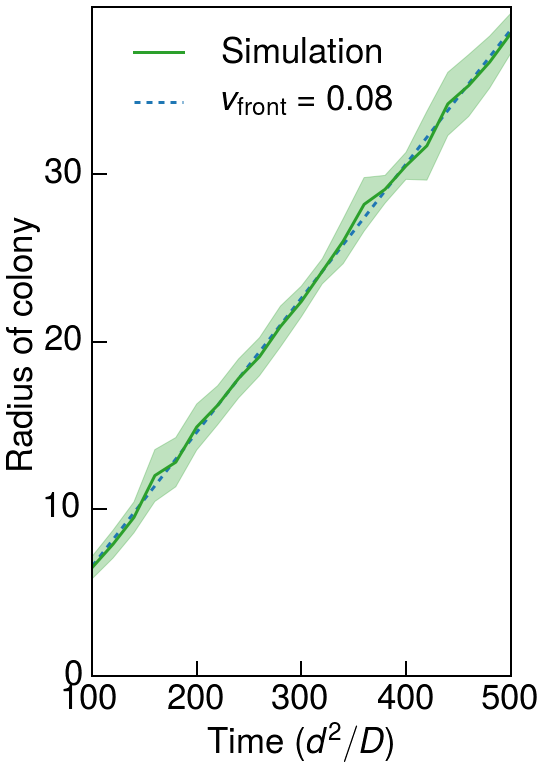

In [11]:
# Set size of a figure
# Common sizes: (10, 7.5) and (12, 9)    
#plt.figure(figsize=(10, 7.5))    
plt.figure(figsize=(7.5,12)) 
    
# Set axis   
ax = plt.subplot(111)   

# Set line width of axes
ax.spines["top"].set_linewidth(2)    
ax.spines["bottom"].set_linewidth(2)    
ax.spines["right"].set_linewidth(2)    
ax.spines["left"].set_linewidth(2) 
Front=np.zeros([10,30])


# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot. 
plt.yticks(range(0, 40,10), [str(x) for x in range(0, 40,10)], fontsize=35)    
plt.xticks(range(0,30,5),[str(x) for x in range(100,700,100)], fontsize=35) 
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
labelbottom="on", left="on", right="off", labelleft="on",direction='in',length=15,width=2,pad=8,labelsize=35)

k=0
for i in range(10):
    k=0
    for time in range(0,2700,100):
        Cluster_total=np.zeros(59)
        for j in range(1):
            Cluster_total+=Cluster[i,time+j]
        Cluster_total[Cluster_total>0.020]=1
        Cluster_total[Cluster_total<1]=0
        Front[i,k]=np.argwhere(Cluster_total==1)[-1]
        k+=1
  
z = np.polyfit( np.arange(0,20) , np.average(Front, axis=0)[0:20] , 1)
xx=np.linspace(0,50,100)
yy=z[0]*xx+z[1]
print(z[0])

p1, = plt.plot(xx,yy,lw=3.0,linestyle='--', color=tableau10[0])


p2, = plt.plot(np.average(Front, axis=0) , marker='o',markersize=0, markeredgewidth=0,markeredgecolor=tableau10[i] ,lw=3.0,linestyle='-',markerfacecolor=tableau10[2],color=tableau10[2],alpha=1.0)
ax.fill_between(np.arange(0,30),np.average(Front, axis=0)-Front.std(axis=0),np.average(Front, axis=0)+Front.std(axis=0),color=tableau10[2], facecolor=tableau10[2], alpha=0.3)



plt.xlabel(r'Time ($d^2/D$)',fontsize=35)
plt.ylabel('Radius of colony',fontsize=35)    
plt.ylim(0,40)
plt.xlim(0,20)
plt.legend([p2,p1],["Simulation",r"$v_{\rm{front}}=0.08$"],prop={'size':35},loc=2,markerscale=2, numpoints=2).get_frame().set_alpha(0.0)
#plt.savefig('/Users/hidenori/Google Drive/Research/Replication/Figures/figure_4/figure_4b.pdf', bbox_inches='tight',format='pdf')

# Fig. 4.
``file name'' = /Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/trajNc3N1652L82MM10CM14Run2.dat

``time step'' = 410 ,910 ,1410 ,1910  

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


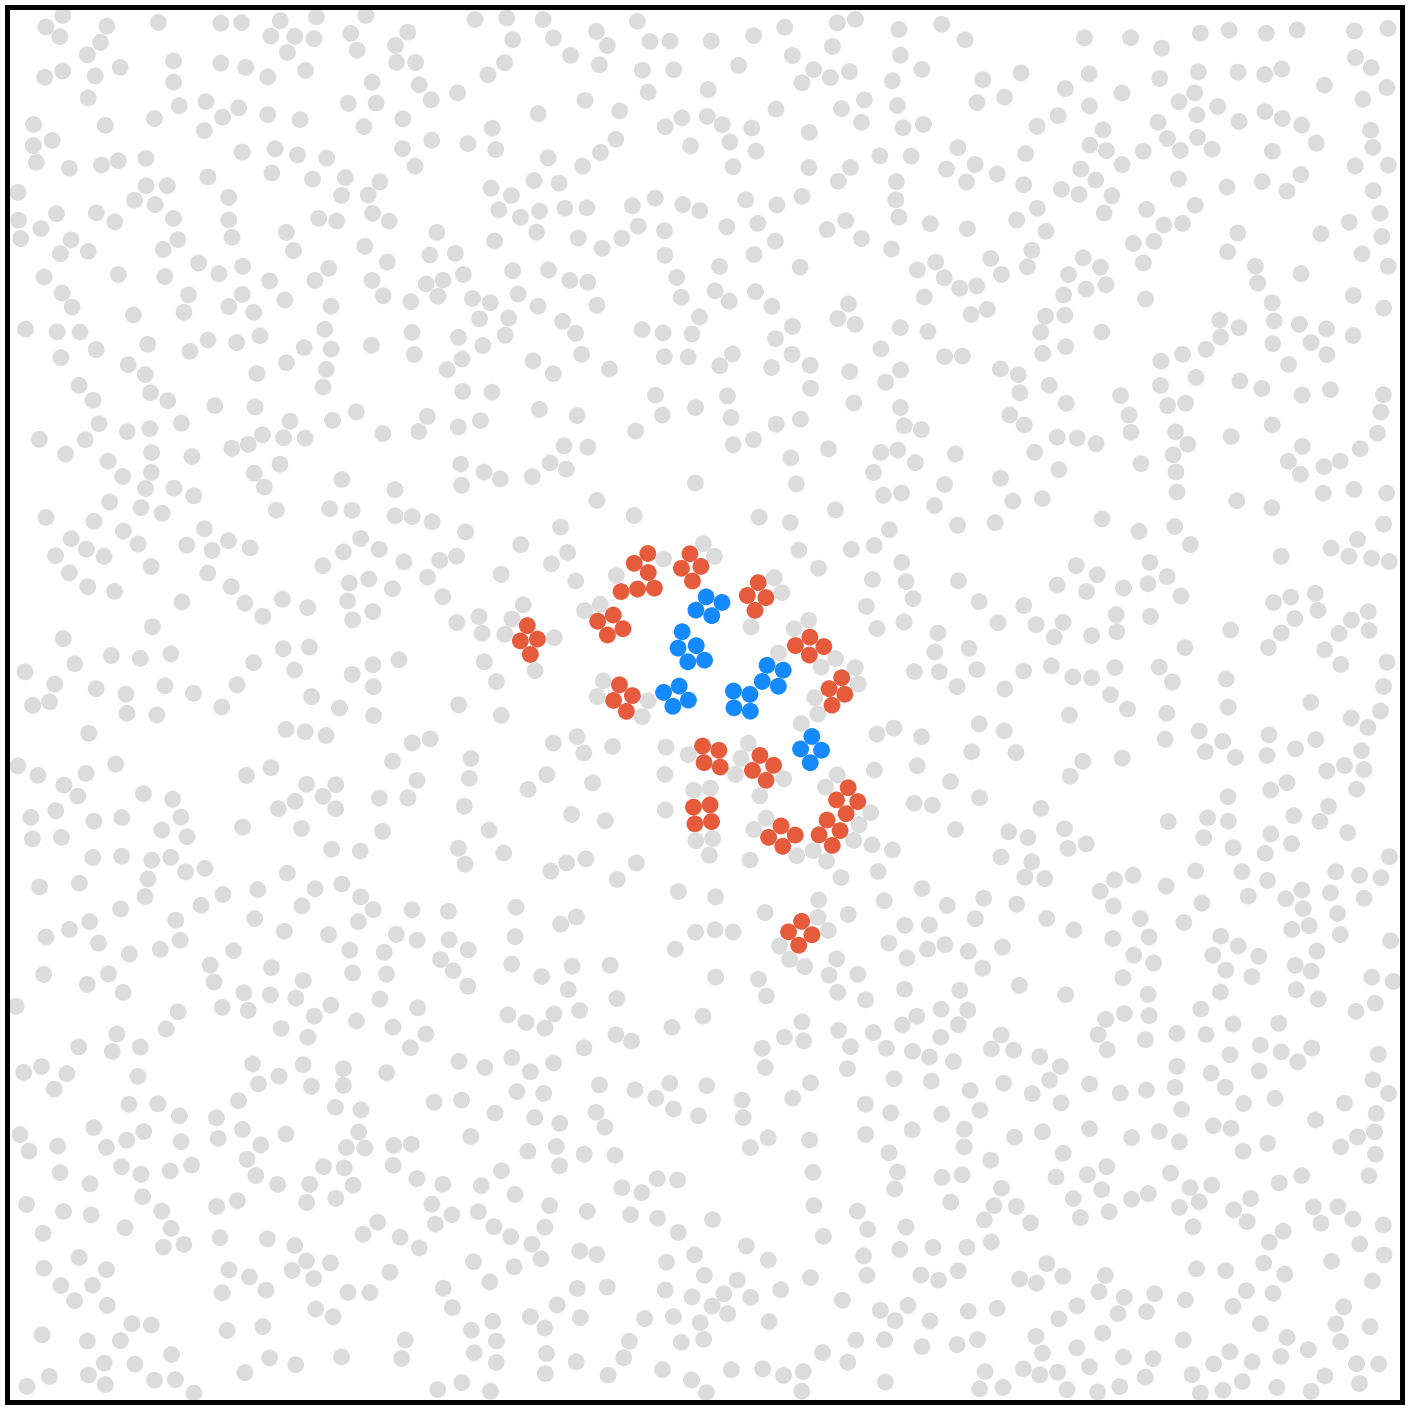

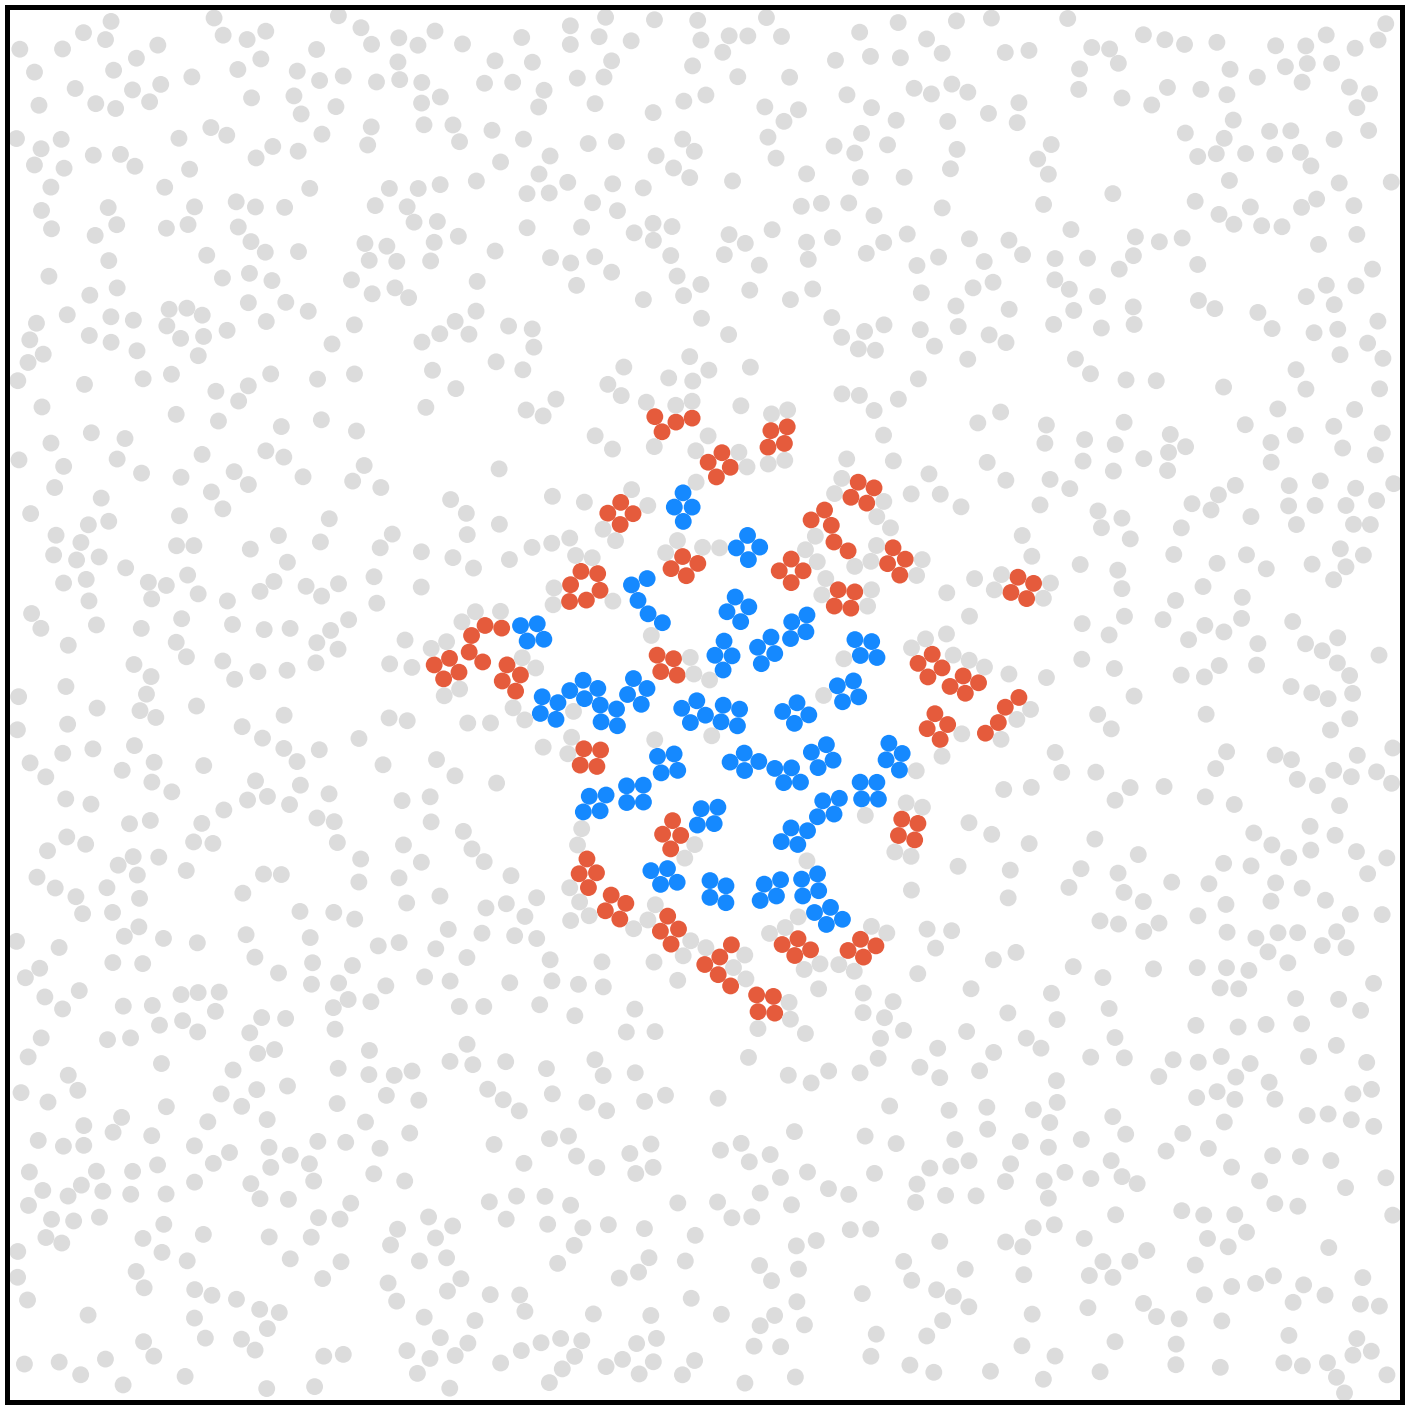

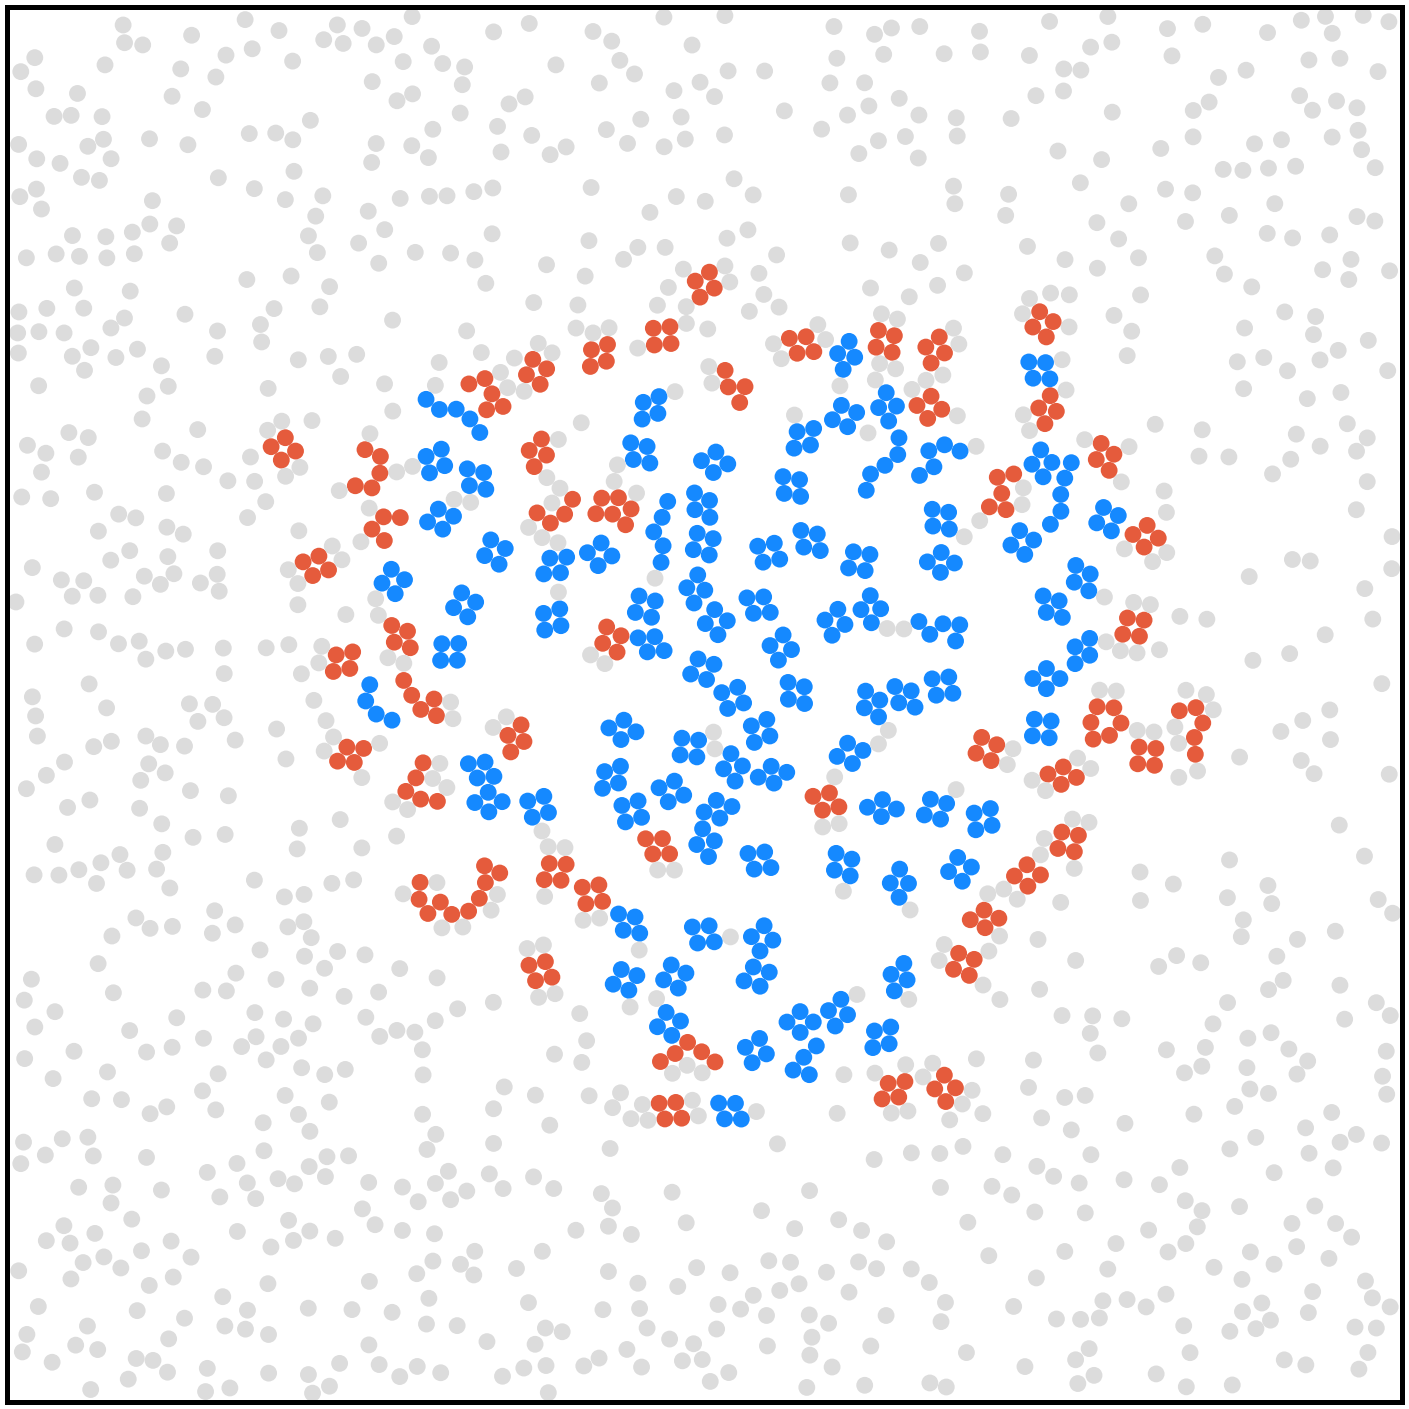

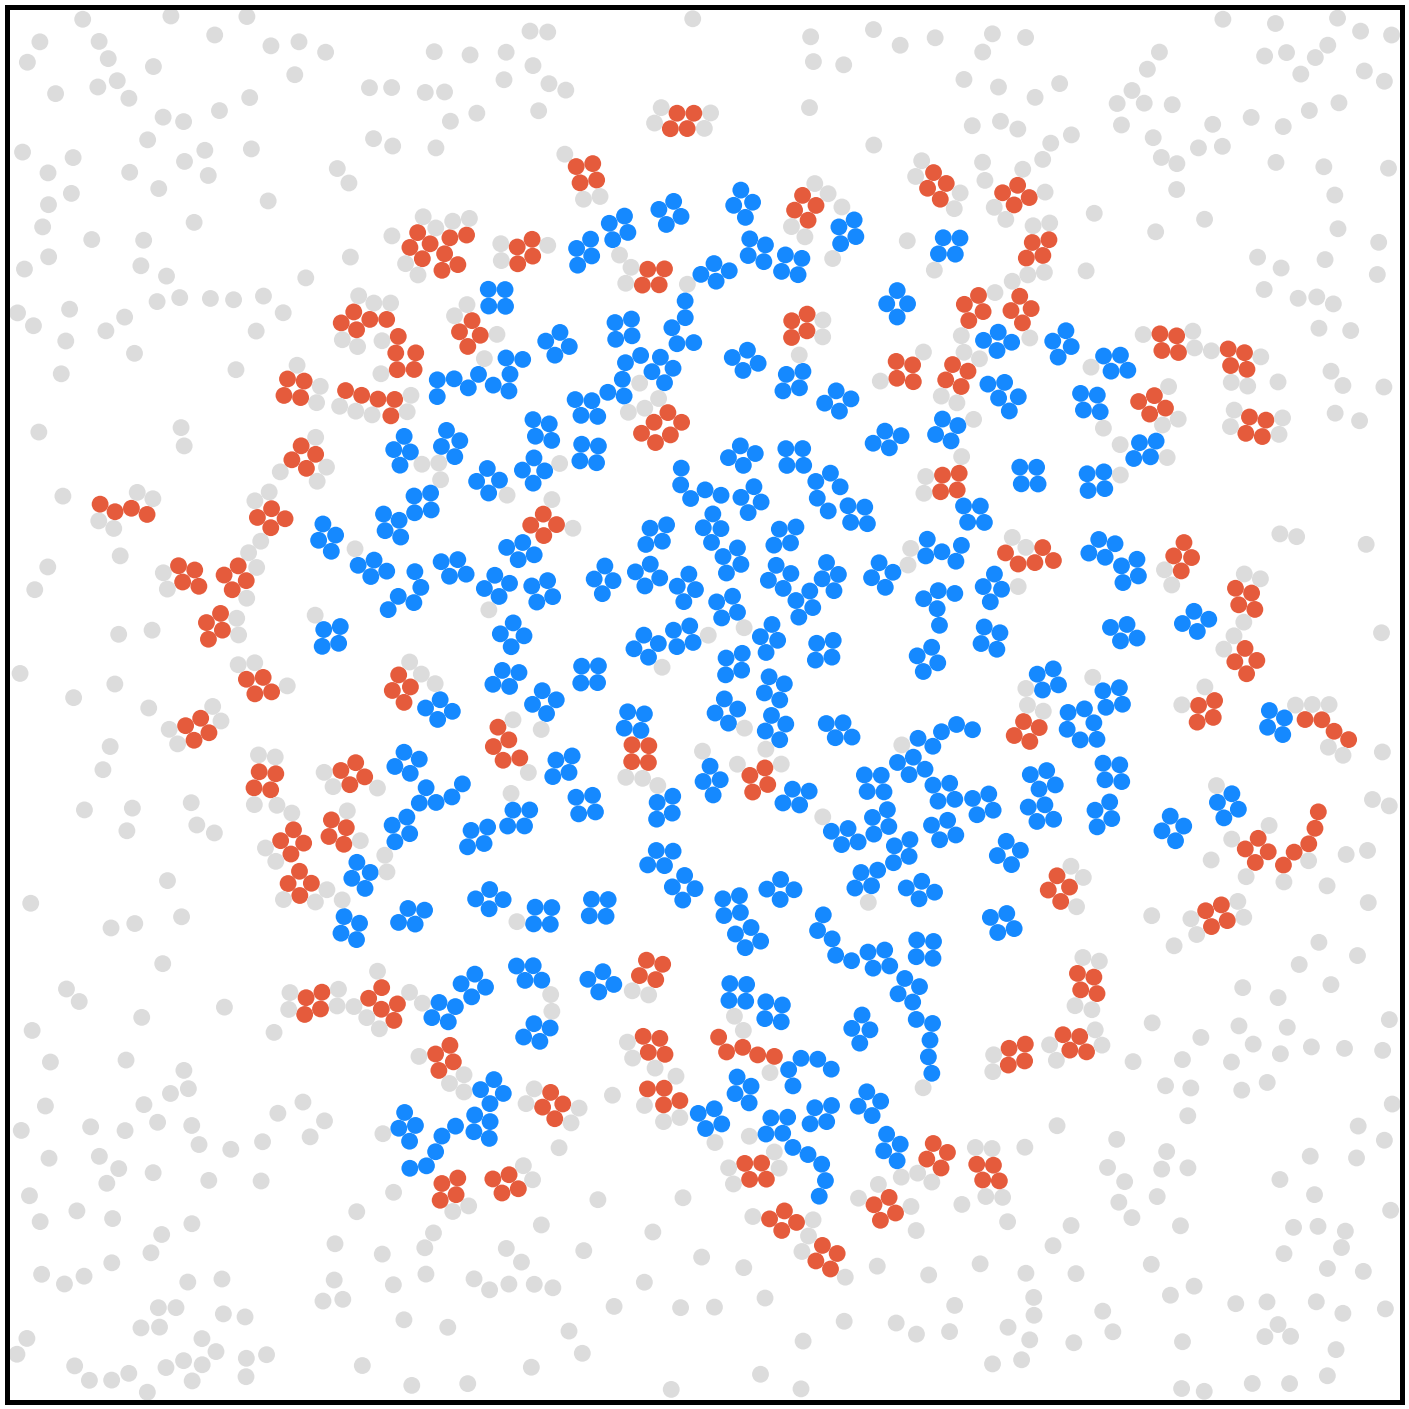

In [18]:
# Set total number of particles
N=1652

# Input name of trajectory file
trajfile = '/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/trajNc3N1652L82MM10CM14Run2.dat'

# Calculate the length of a file
with open(trajfile) as f:
    len_trajfile = int(sum(1 for _ in f)/(N+2))

# Iterate over time
for time in np.arange(410,1911,500):
    # Import data file
    data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(8))
    data.columns=['PIN','SV','CA0','CA1','CA2','CIN','x','y']

    # group dataframe by cluster identification number
    grouped=data.groupby(['CIN'])

    # Want to count number of attached monomers to the cluster
    # If any particle is connected to cluster, we set CA=1. otherwise CA=0
    data['CA0'][data['CA0']>=0]=1
    data['CA0'][data['CA0']<0] =0

    # Group monomers by cluster identification number. (Gather cluster members)
    grouped=data.groupby(['CIN'])

    # Calculate number of attached monomers to the cluster
    Num_attached_mono = grouped.aggregate(np.sum)['CA0']

    # If a cluster has less than 2 monomers attached, then plot them with blue color
    Num_attached_mono[Num_attached_mono<2] =0
    # If a cluster has more than 2 monomers attached, we plot them with full color
    Num_attached_mono[Num_attached_mono>=2]=1
    # We are setting this to be 5, to plot them with blue color
    Num_attached_mono[Num_attached_mono==0]=5
    # If monomer has attached monomer, we don't plot it
    Num_attached_mono[-1]=0

    figure(figsize=(25,25))
    # Set axis   
    ax = plt.subplot(111)   

    # Set line width of axes
    ax.spines["top"].set_linewidth(5)    
    ax.spines["bottom"].set_linewidth(5)    
    ax.spines["right"].set_linewidth(5)    
    ax.spines["left"].set_linewidth(5) 
    plt.axes()
    
    X = data['x']
    Y = data['y']
    area = np.pi * (90)
    plt.axes()
    plt.scatter(X, Y, s=area, c=(data['SV']*pd.DataFrame( np.array( Num_attached_mono[data['CIN']] ) )[0]).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#E55B3C').replace(3,'#E55B3C').replace(4,'#E55B3C').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF'), edgecolor='none',alpha= 1.0)
   
    plt.axis('tight')
    plt.xlim(-41.5, 41.5)
    plt.xticks(())
    plt.ylim(-41.5, 41.5)
    plt.yticks(())

    Num_attached_mono = grouped.aggregate(np.sum)['CA0']
    Num_attached_mono[Num_attached_mono<2] =0
    # If a cluster has more than 2 monomers attached, we plot them with full color
    Num_attached_mono[Num_attached_mono>=2]=1
    #plt.savefig('/Users/hidenori/Google Drive/Research/Replication/Figures/figure_3/figure_3_MM10CM14Run2_'+str(time)+'.pdf', bbox_inches='tight',format='pdf')
    #plt.close('all')

# Fig. 5. (a), (b1), (b2)

2028


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


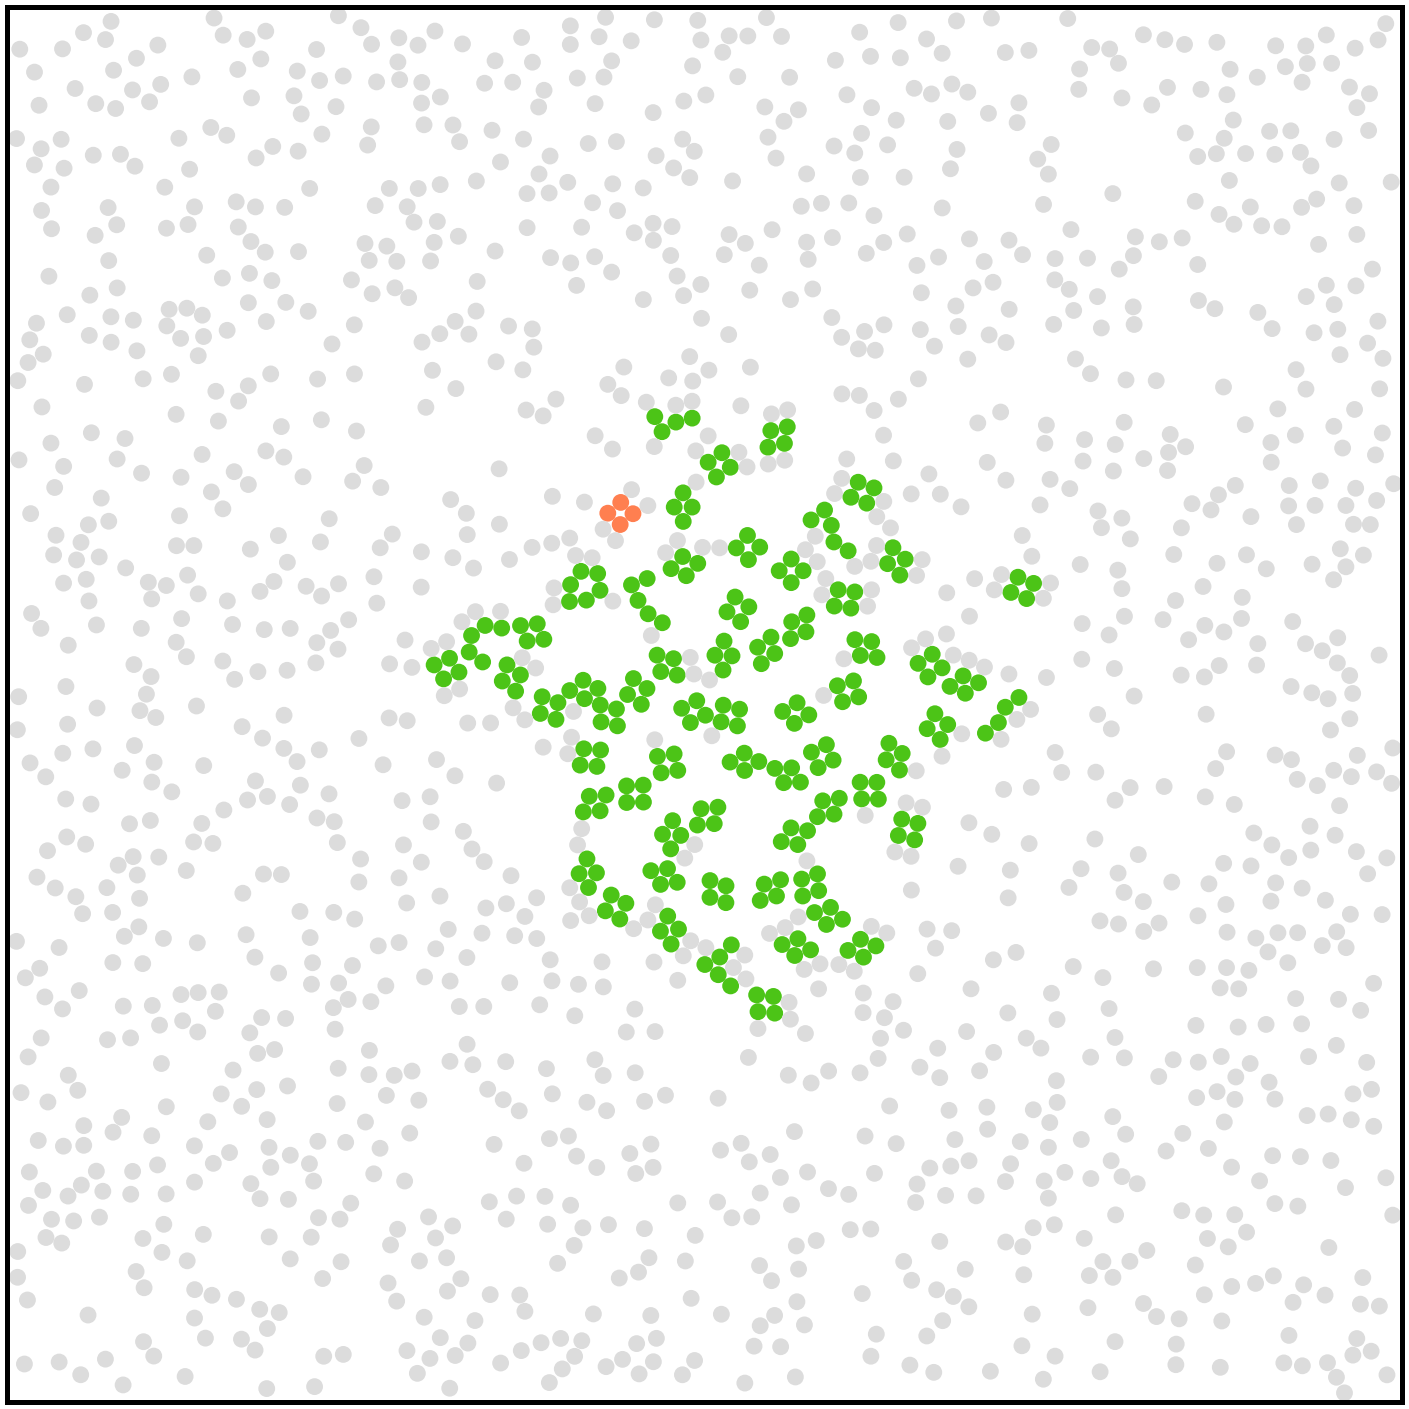

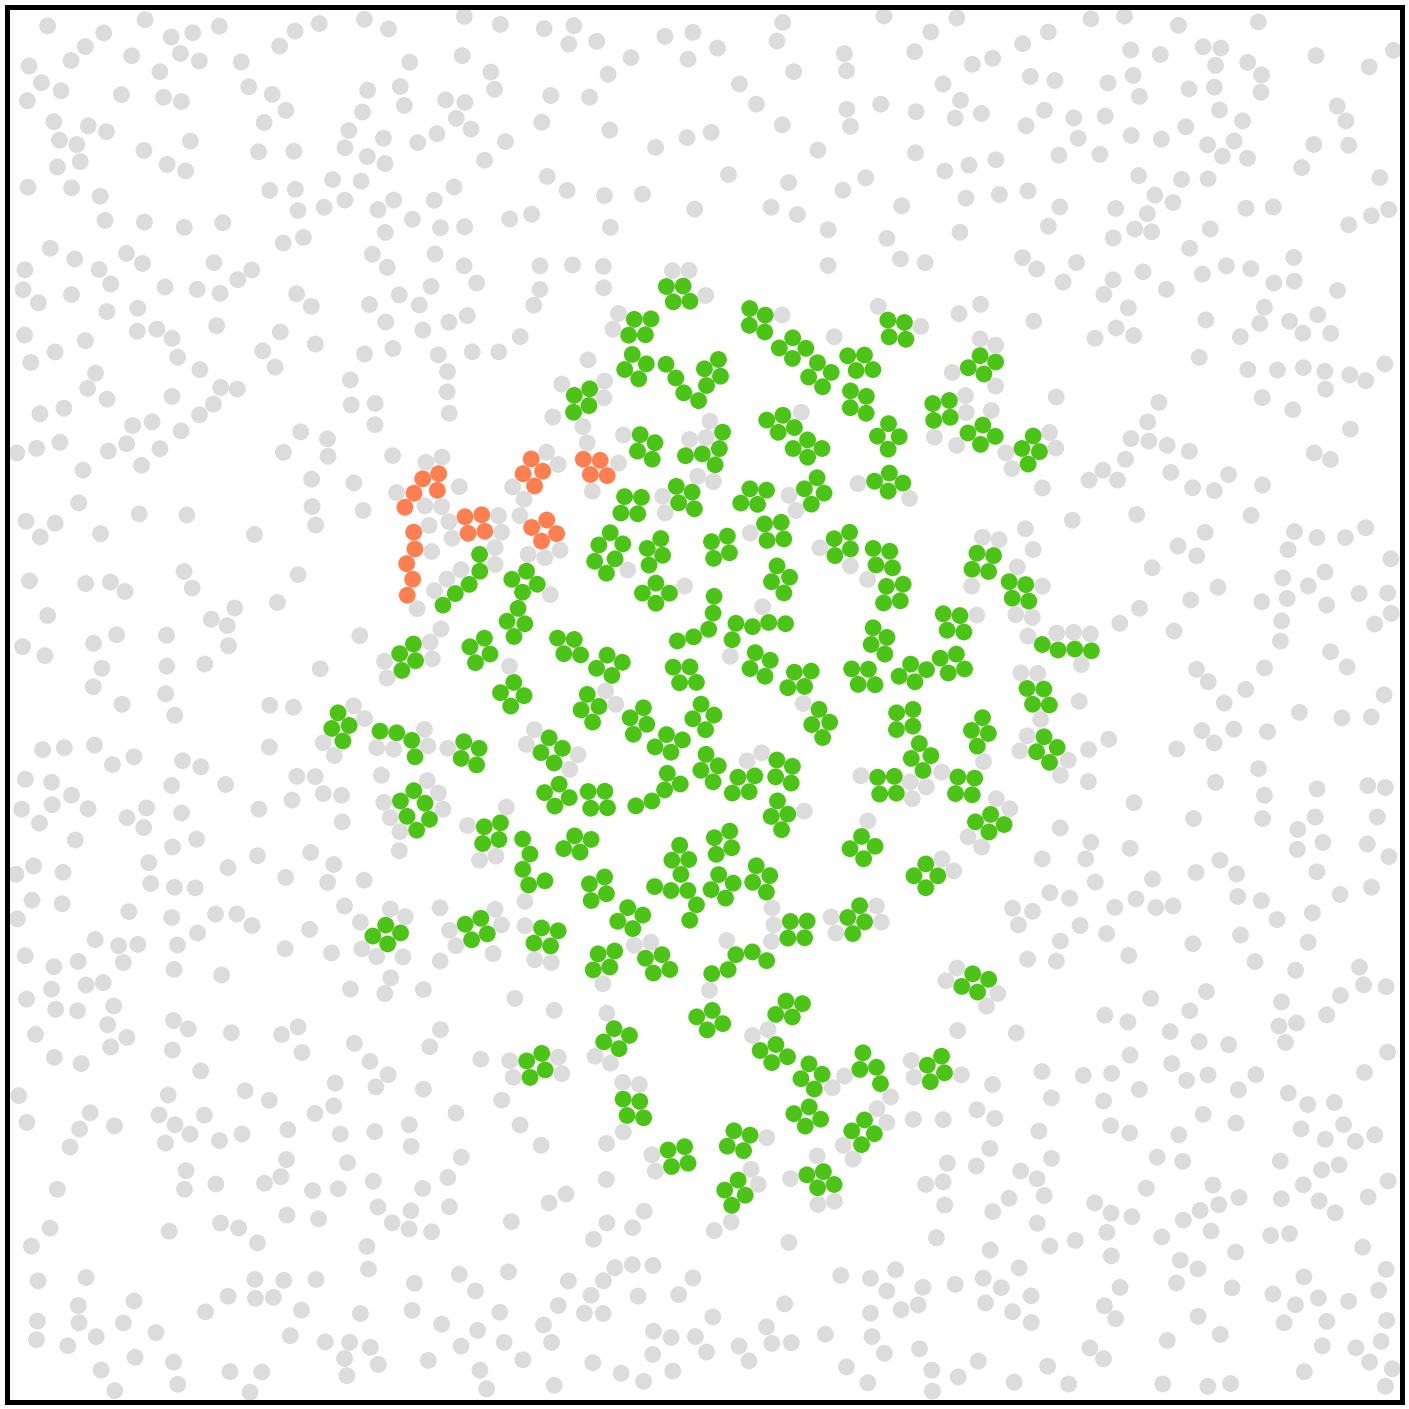

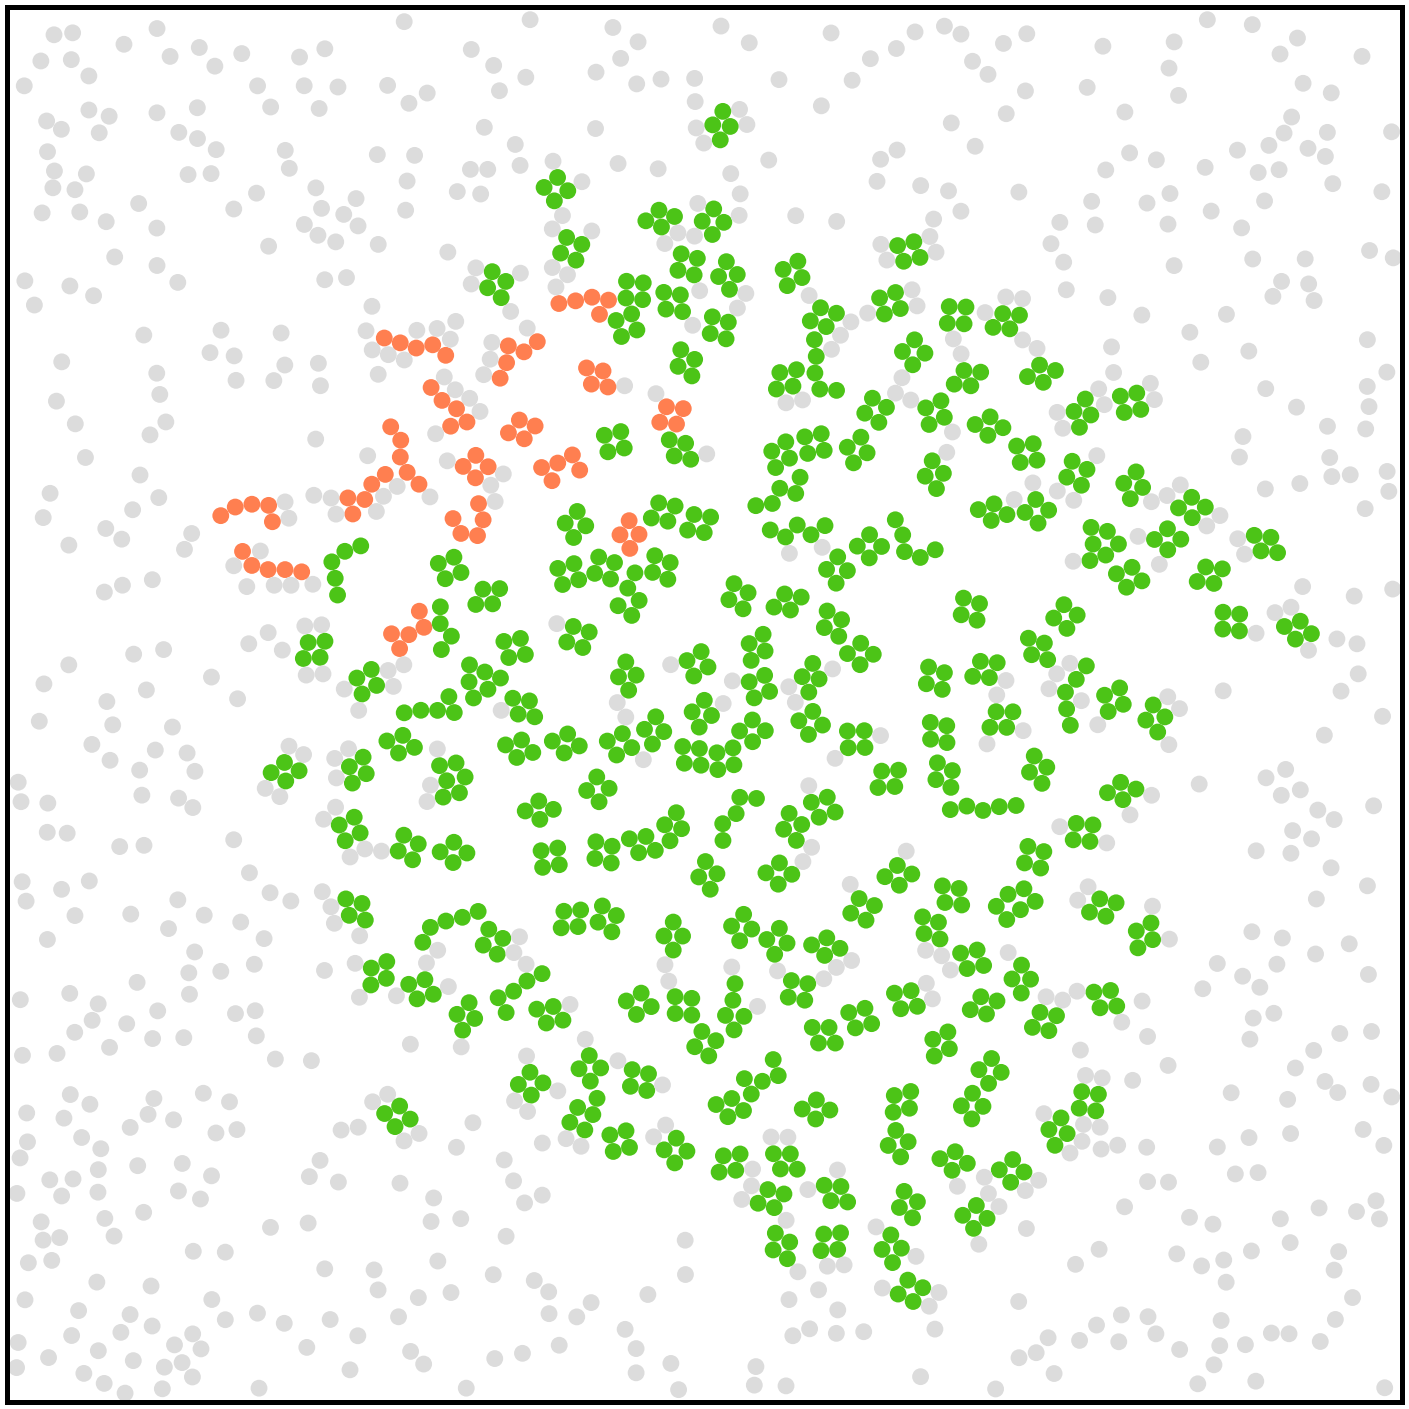

In [39]:
# Set total number of particles
N=1652


for k in range(0,1):
    # Input name of trajectory file
    #trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Mutation/Mutation/trajNc3N1652L82MM10CM14Run0.dat'
    #trajfile = '/Users/hidenori/Research/RCdata/Repli/06_02_Mutation/Mu_trajNc3N1652L82MM10CM14Run'+str(k)+'.dat'
    #trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Mutation/Mutation_Load/Mu_trajNcN1652L82MM10CM14Run4.dat'
    trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Mutation/Mutation_Load1/Mu_trajNcN1652L82MM10CM14Run4.dat'
    # Calculate the length of a file
    with open(trajfile) as f:
        len_trajfile = int(sum(1 for _ in f)/(N+2))
    print(len_trajfile)
    # Iterate over time
    #len_trajfile=1001
    for time in np.arange( 0, 1001,500):#len_trajfile-1,len_trajfile,1):
        # Import data file
        data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(9))
        data.columns=['PIN','SV','CA0','CA1','CA2','CIN','Nc','x','y']

        # group dataframe by cluster identification number
        grouped=data.groupby(['CIN'])

        # Want to count number of attached monomers to the cluster
        # If any particle is connected to cluster, we set CA=1. otherwise CA=0
        data['CA0'][data['CA0']>=0]=1
        data['CA0'][data['CA0']<0] =0

        # Group monomers by cluster identification number. (Gather cluster members)
        grouped=data.groupby(['CIN'])

        # Calculate number of attached monomers to the cluster
        Num_attached_mono = grouped.aggregate(np.sum)['CA0']

        # If a cluster has less than 2 monomers attached, then plot them with blue color
        Num_attached_mono[Num_attached_mono<2] =0
        # If a cluster has more than 2 monomers attached, we plot them with full color
        Num_attached_mono[Num_attached_mono>=2]=1
        # We are setting this to be 5, to plot them with blue color
        Num_attached_mono[Num_attached_mono==0]=5
        # If monomer has attached monomer, we don't plot it
        Num_attached_mono[-1]=0

        figure(figsize=(25,25))
        # Set axis   
        ax = plt.subplot(111)   

        # Set line width of axes
        ax.spines["top"].set_linewidth(5)    
        ax.spines["bottom"].set_linewidth(5)    
        ax.spines["right"].set_linewidth(5)    
        ax.spines["left"].set_linewidth(5) 
        plt.axes()

        X = data['x']
        Y = data['y']
        area = np.pi * (90)
        plt.axes()
    
    
    
    
    

        # * pd.DataFrame( np.array( Num_attached_mono[data['CIN']] ) )[0]
        plt.scatter(X, Y, s=area, c=(data['Nc']).replace(0,'#DCDCDC').replace(3,'#4CC417').replace(4,'#FF7F50'), edgecolor='none',alpha= 1.0)
        #plt.scatter(X, Y, s=area, c=(data['Nc']).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#E55B3C').replace(3,'#E55B3C').replace(4,'#4CC417').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF').replace(25,'#4CC417').replace(50,'#4CC417').replace(75,'#4CC417').replace(100,'#4CC417'), edgecolor='none',alpha= 1.0)
        #plt.scatter(X, Y, s=area, c=(data['Nc']* pd.DataFrame( np.array( Num_attached_mono[data['CIN']] ) )[0] ).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#E55B3C').replace(3,'#E55B3C').replace(4,'#4CC417').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF').replace(25,'#4CC417').replace(50,'#4CC417').replace(75,'#4CC417').replace(100,'#4CC417'), edgecolor='none',alpha= 1.0)
        #plt.scatter(X, Y, s=area, c=(data['Nc']).replace(0,'#DCDCDC').replace(1,'#4CC417').replace(2,'#4CC417').replace(3,'#4CC417').replace(4,'#4CC417').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF').replace(25,'#4CC417').replace(50,'#4CC417').replace(75,'#4CC417').replace(100,'#4CC417'), edgecolor='none',alpha= 1.0)
        #.replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#1589FF').replace(3,'#FF7F50').replace(4,'#4CC417')
        
        plt.axis('tight')
        plt.xlim(-41.5, 41.5)
        plt.xticks(())
        plt.ylim(-41.5, 41.5)
        plt.yticks(())

        Num_attached_mono = grouped.aggregate(np.sum)['CA0']
        Num_attached_mono[Num_attached_mono<2] =0
        # If a cluster has more than 2 monomers attached, we plot them with full color
        Num_attached_mono[Num_attached_mono>=2]=1
        #plt.savefig('/Users/hidenori/Desktop/Images3/Simulation'+str(k)+'-'+str(time)+'.pdf', bbox_inches='tight',format='pdf')
        #plt.close('all')

# Fig. 5. (a), (c1), (c2)

In [ ]:
# Set total number of particles
N=1652


for k in range(0,13):
    # Input name of trajectory file
    #trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Mutation/Mutation/trajNc3N1652L82MM10CM14Run'+str(k)+'.dat'
    #trajfile = '/Users/hidenori/Research/RCdata/Repli/06_02_Mutation/Mu_trajNc3N1652L82MM10CM14Run'+str(k)+'.dat'
    #trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Mutation/Mutation_Load/Mu_trajNcN1652L82MM10CM14Run4.dat'
    #trajfile = '/Users/hidenori/Research/RCdata/Repli/06_02_Mutation/Mu_trajNc3N1652L82MM10CM14Run'+str(k)+'.dat'
    # Calculate the length of a file
    trajfile='/Users/hidenori/Google Drive/Mutation/Mu_trajNc3N1652L82MM10CM14Run'+str(k)+'.dat'
    with open(trajfile) as f:
        len_trajfile = int(sum(1 for _ in f)/(N+2))
    print(len_trajfile)
    # Iterate over time
    #len_trajfile=1001
    for time in np.arange( 1250, 1501,250):#len_trajfile-1,len_trajfile,1):
        # Import data file
        data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(9))
        data.columns=['PIN','SV','CA0','CA1','CA2','CIN','Nc','x','y']

        # group dataframe by cluster identification number
        grouped=data.groupby(['CIN'])

        # Want to count number of attached monomers to the cluster
        # If any particle is connected to cluster, we set CA=1. otherwise CA=0
        data['CA0'][data['CA0']>=0]=1
        data['CA0'][data['CA0']<0] =0

        # Group monomers by cluster identification number. (Gather cluster members)
        grouped=data.groupby(['CIN'])

        # Calculate number of attached monomers to the cluster
        Num_attached_mono = grouped.aggregate(np.sum)['CA0']

        # If a cluster has less than 2 monomers attached, then plot them with blue color
        Num_attached_mono[Num_attached_mono<2] =0
        # If a cluster has more than 2 monomers attached, we plot them with full color
        Num_attached_mono[Num_attached_mono>=2]=1
        # We are setting this to be 5, to plot them with blue color
        Num_attached_mono[Num_attached_mono==0]=5
        # If monomer has attached monomer, we don't plot it
        Num_attached_mono[-1]=0

        figure(figsize=(25,25))
        # Set axis   
        ax = plt.subplot(111)   

        # Set line width of axes
        ax.spines["top"].set_linewidth(5)    
        ax.spines["bottom"].set_linewidth(5)    
        ax.spines["right"].set_linewidth(5)    
        ax.spines["left"].set_linewidth(5) 
        plt.axes()

        X = data['x']
        Y = data['y']
        area = np.pi * (90)
        plt.axes()
    
    
    
    
    

        # * pd.DataFrame( np.array( Num_attached_mono[data['CIN']] ) )[0]
        plt.scatter(X, Y, s=area, c=(data['Nc']).replace(0,'#DCDCDC').replace(3,'#4CC417').replace(4,'#FF7F50'), edgecolor='none',alpha= 1.0)
        #plt.scatter(X, Y, s=area, c=(data['Nc']).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#E55B3C').replace(3,'#E55B3C').replace(4,'#4CC417').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF').replace(25,'#4CC417').replace(50,'#4CC417').replace(75,'#4CC417').replace(100,'#4CC417'), edgecolor='none',alpha= 1.0)
        #plt.scatter(X, Y, s=area, c=(data['Nc']* pd.DataFrame( np.array( Num_attached_mono[data['CIN']] ) )[0] ).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#E55B3C').replace(3,'#E55B3C').replace(4,'#4CC417').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF').replace(25,'#4CC417').replace(50,'#4CC417').replace(75,'#4CC417').replace(100,'#4CC417'), edgecolor='none',alpha= 1.0)
        #plt.scatter(X, Y, s=area, c=(data['Nc']).replace(0,'#DCDCDC').replace(1,'#4CC417').replace(2,'#4CC417').replace(3,'#4CC417').replace(4,'#4CC417').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF').replace(25,'#4CC417').replace(50,'#4CC417').replace(75,'#4CC417').replace(100,'#4CC417'), edgecolor='none',alpha= 1.0)
        #.replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#1589FF').replace(3,'#FF7F50').replace(4,'#4CC417')
        
        plt.axis('tight')
        plt.xlim(-41.5, 41.5)
        plt.xticks(())
        plt.ylim(-41.5, 41.5)
        plt.yticks(())

        Num_attached_mono = grouped.aggregate(np.sum)['CA0']
        Num_attached_mono[Num_attached_mono<2] =0
        # If a cluster has more than 2 monomers attached, we plot them with full color
        Num_attached_mono[Num_attached_mono>=2]=1
        plt.savefig('/Users/hidenori/Dropbox/2DReplication/MutationImages/Simulation'+str(k)+'-'+str(time)+'.pdf', bbox_inches='tight',format='pdf')
        plt.close('all')

In [5]:
for i in range(1,2):
    trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Area_Fraction1/trajNc3N1652L'+str(92+20*i)+'MM10CM14Run'+str(i)+'.dat'
    #trajfile = '/Users/hidenori/Research/trace_generation/trajNc3N1652L82MM10CM14Run0.dat'
    N=1652
    L=92+20*i 
    # Calculate the length of a file
    with open(trajfile) as f:
        len_trajfile = int(sum(1 for _ in f)/(N+2))
    print(len_trajfile)
    # Iterate over time
    for time in np.arange(len_trajfile-1,len_trajfile,1):
        # Import data file
        data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(8))
        data.columns=['PIN','SV','CA0','CA1','CA2','CIN','x','y']

        # group dataframe by cluster identification number
        grouped=data.groupby(['CIN'])

        # Want to count number of attached monomers to the cluster
        # If any particle is connected to cluster, we set CA=1. otherwise CA=0
        data['CA0'][data['CA0']>=0]=1
        data['CA0'][data['CA0']<0] =0

        # Group monomers by cluster identification number. (Gather cluster members)
        grouped=data.groupby(['CIN'])

        # Calculate number of attached monomers to the cluster
        Num_attached_mono = grouped.aggregate(np.sum)['CA0']

        # If a cluster has less than 2 monomers attached, then plot them with blue color
        Num_attached_mono[Num_attached_mono<2] =0
        # If a cluster has more than 2 monomers attached, we plot them with full color
        Num_attached_mono[Num_attached_mono>=2]=1
        # We are setting this to be 5, to plot them with blue color
        Num_attached_mono[Num_attached_mono==0]=5
        # If monomer has attached monomer, we don't plot it
        Num_attached_mono[-1]=0

        figure(figsize=(25,25))
        # Set axis   
        ax = plt.subplot(111)   

        # Set line width of axes
        ax.spines["top"].set_linewidth(5)    
        ax.spines["bottom"].set_linewidth(5)    
        ax.spines["right"].set_linewidth(5)    
        ax.spines["left"].set_linewidth(5) 
        plt.axes()

        X = data['x']
        Y = data['y']
        area = np.pi * (90*((82/L)**2))
        plt.axes()
        plt.scatter(X, Y, s=area, c=(data['SV']*pd.DataFrame( np.array( Num_attached_mono[data['CIN']] ) )[0]).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#E55B3C').replace(3,'#E55B3C').replace(4,'#E55B3C').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF'), edgecolor='none',alpha= 1.0)

        plt.axis('tight')
        plt.xlim(-L/2-0.5, L/2+0.5)
        plt.xticks(())
        plt.ylim(-L/2-0.5, L/2+0.5)
        plt.yticks(())
        Num_attached_mono = grouped.aggregate(np.sum)['CA0']
        Num_attached_mono[Num_attached_mono<2] =0
        # If a cluster has more than 2 monomers attached, we plot them with full color
        Num_attached_mono[Num_attached_mono>=2]=1
        plt.savefig('/Users/hidenori/Research/'+str(i)+'/Movie'+str(i)+'time'+str(time)+'.png', bbox_inches='tight',format='png')
        plt.close('all')

3066


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
#trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Mutation/Mutation/trajNc3N1652L82MM10CM14Run2.dat'
#trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Mutation/Mutation_Load/Mu_trajNc3N1652L82MM10CM14Run4.dat'
i=5
trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Area_Fraction/trajNc3N1652L'+str(82+20*i)+'MM10CM14Run'+str(i)+'.dat'
#trajfile = '/Users/hidenori/Research/trace_generation/trajNc3N1652L82MM10CM14Run0.dat'
N=1652
L=82+20*i 

# Calculate the length of a file
with open(trajfile) as f:
    len_trajfile = int(sum(1 for _ in f)/(N+2))
print(len_trajfile)

for time in np.arange(0,len_trajfile,len_trajfile-1): 
###-------------- IMPORT DATA FILE ------------------### 
    data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(8))

    data.columns=['PIN','SV','CA0','CA1','CA2','CIN','x','y']
   
    data['CIN'][data['CIN']>=0]=1



    figure(figsize=(25,25))
    ax=subplot(aspect='equal')
    X = data['x']
    Y = data['y']
    area = np.pi * (90*((82/L)**2))
    # Set axis   
    ax = plt.subplot(111)   

    # Set line width of axes
    ax.spines["top"].set_linewidth(5)    
    ax.spines["bottom"].set_linewidth(5)    
    ax.spines["right"].set_linewidth(5)    
    ax.spines["left"].set_linewidth(5) 
    plt.axes()
    plt.scatter(X, Y, s=area, c=(data['SV']*(data['CIN'].replace(-1,0))).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#1589FF').replace(3,'#FF7F50').replace(4,'#4CC417'),edgecolor='none', alpha= 1.0) 
    plt.axis('tight')
    plt.xlim(-L/2-0.5, L/2+0.5)
    plt.xticks(())
    plt.ylim(-L/2-0.5, L/2+0.5)
    plt.yticks(())

    #plt.savefig('/Users/hidenori/Desktop/ImageReplication/Image'+str(time)+'.png', bbox_inches='tight',format='png')
    #plt.close('all')

In [5]:
for i in range(5):
    print( 1652*np.pi*0.25/(82+20*i)**2 )

0.19296219005541115
0.12470951229648064
0.08717265291135344
0.06434624905438328
0.049439024764997126


In [6]:
for i in range(3):
    print( 1652*np.pi*0.25/(92+20*i)**2 )

0.1532936869012978
0.10343413312600323
0.07446497738364237
0.05615814430109871


In [ ]:
# Set total number of particles
N=1652

# Input name of trajectory file
trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Reaction_vs_Diffusion_t_910_v2/trajNc3N1652L82MM10CM14Run0.dat'
#trajfile = '/Users/hidenori/Research/trace_generation/trajNc3N1652L82MM10CM14Run0.dat'
N=1652
      
for time in np.arange(0,100,10): 
###-------------- IMPORT DATA FILE ------------------### 
    data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(9))

    data.columns=['PIN','SV','CA0','CA1','CA2','CIN','a','x','y']
   
    data['CIN'][data['CIN']>=0]=1



    figure(figsize=(25,25))
    ax=subplot(aspect='equal')
    X = data['x']
    Y = data['y']
    area = np.pi * (90)
    # Set axis   
    ax = plt.subplot(111)   

    # Set line width of axes
    ax.spines["top"].set_linewidth(5)    
    ax.spines["bottom"].set_linewidth(5)    
    ax.spines["right"].set_linewidth(5)    
    ax.spines["left"].set_linewidth(5) 
    plt.axes()
    plt.scatter(X, Y, s=area, c=(data['SV']*(data['CIN'].replace(-1,0))).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#1589FF').replace(3,'#FF7F50').replace(4,'#4CC417'),edgecolor='none', alpha= 1.0) 
    plt.axis('tight')
    plt.xlim(-41.5, 41.5)
    plt.xticks(())
    plt.ylim(-41.5, 41.5)
    plt.yticks(())

    #plt.savefig('/Users/hidenori/Desktop/ImageReplication/Image'+str(time)+'.png', bbox_inches='tight',format='png')
    #plt.close('all')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


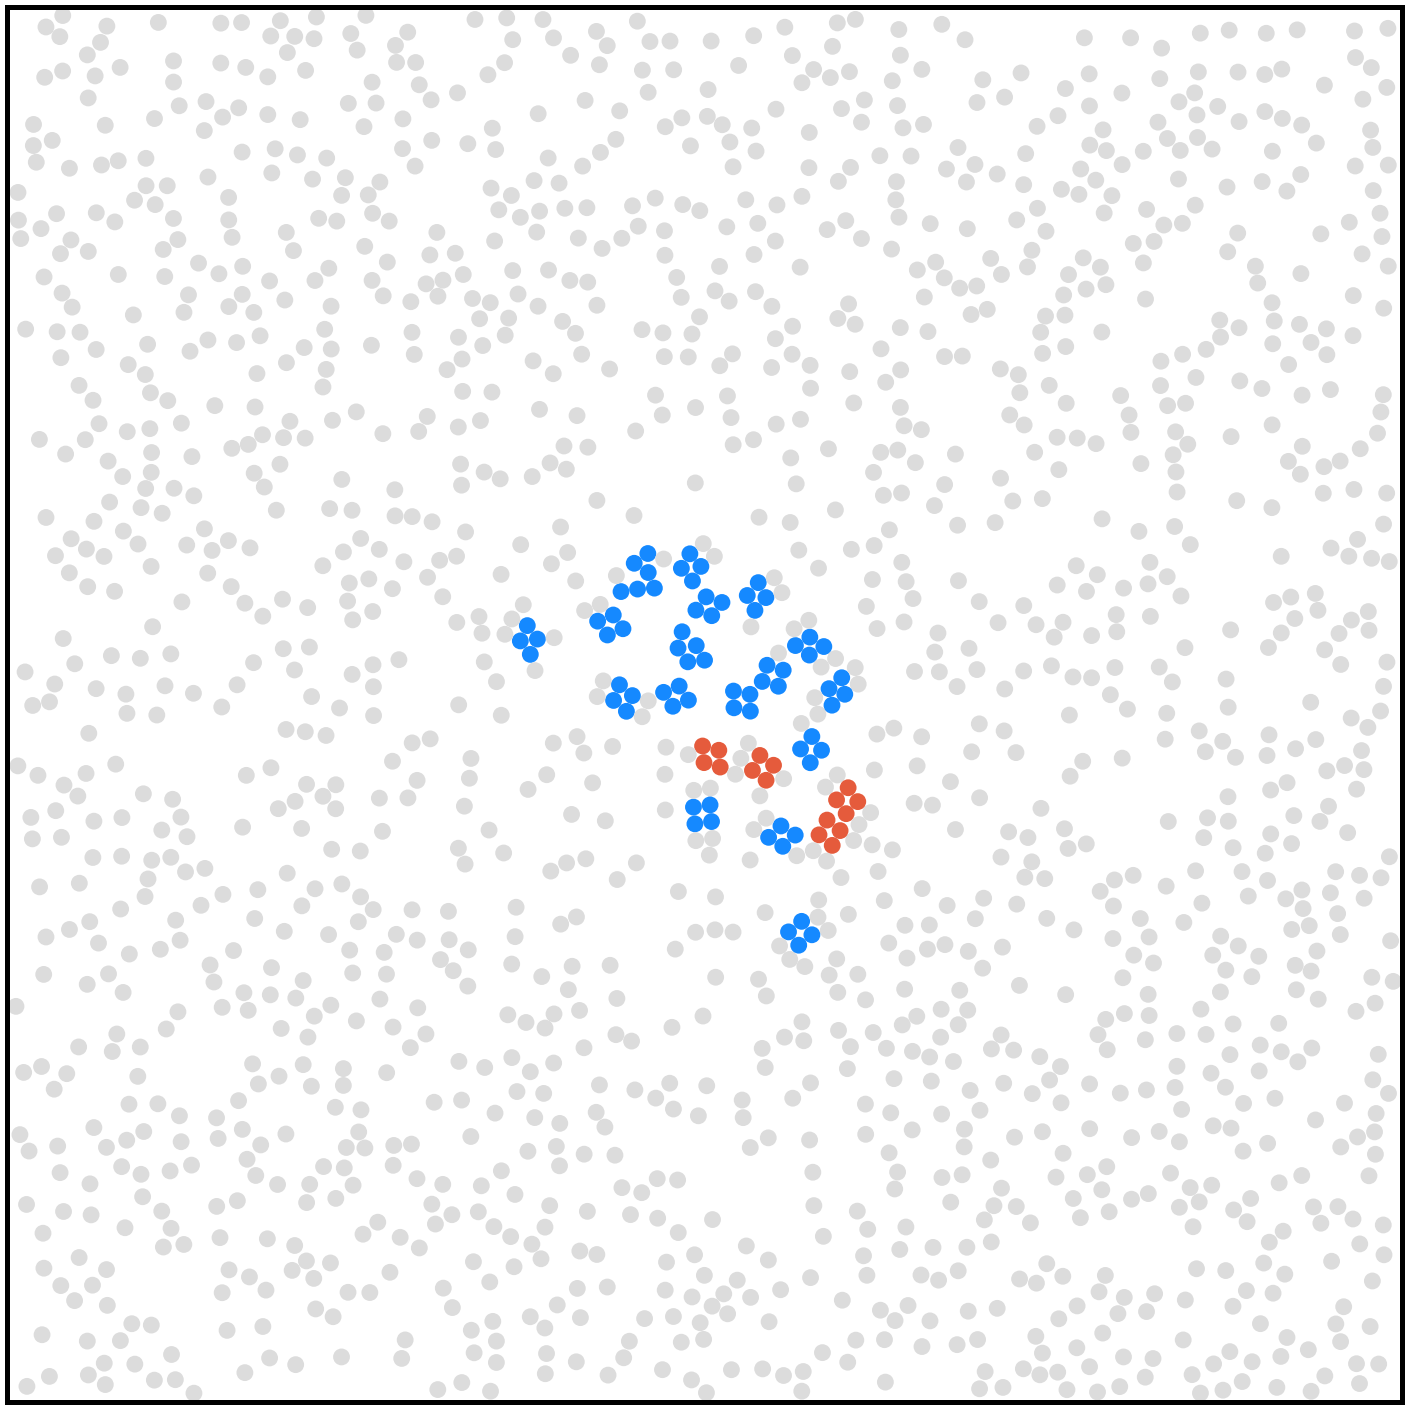

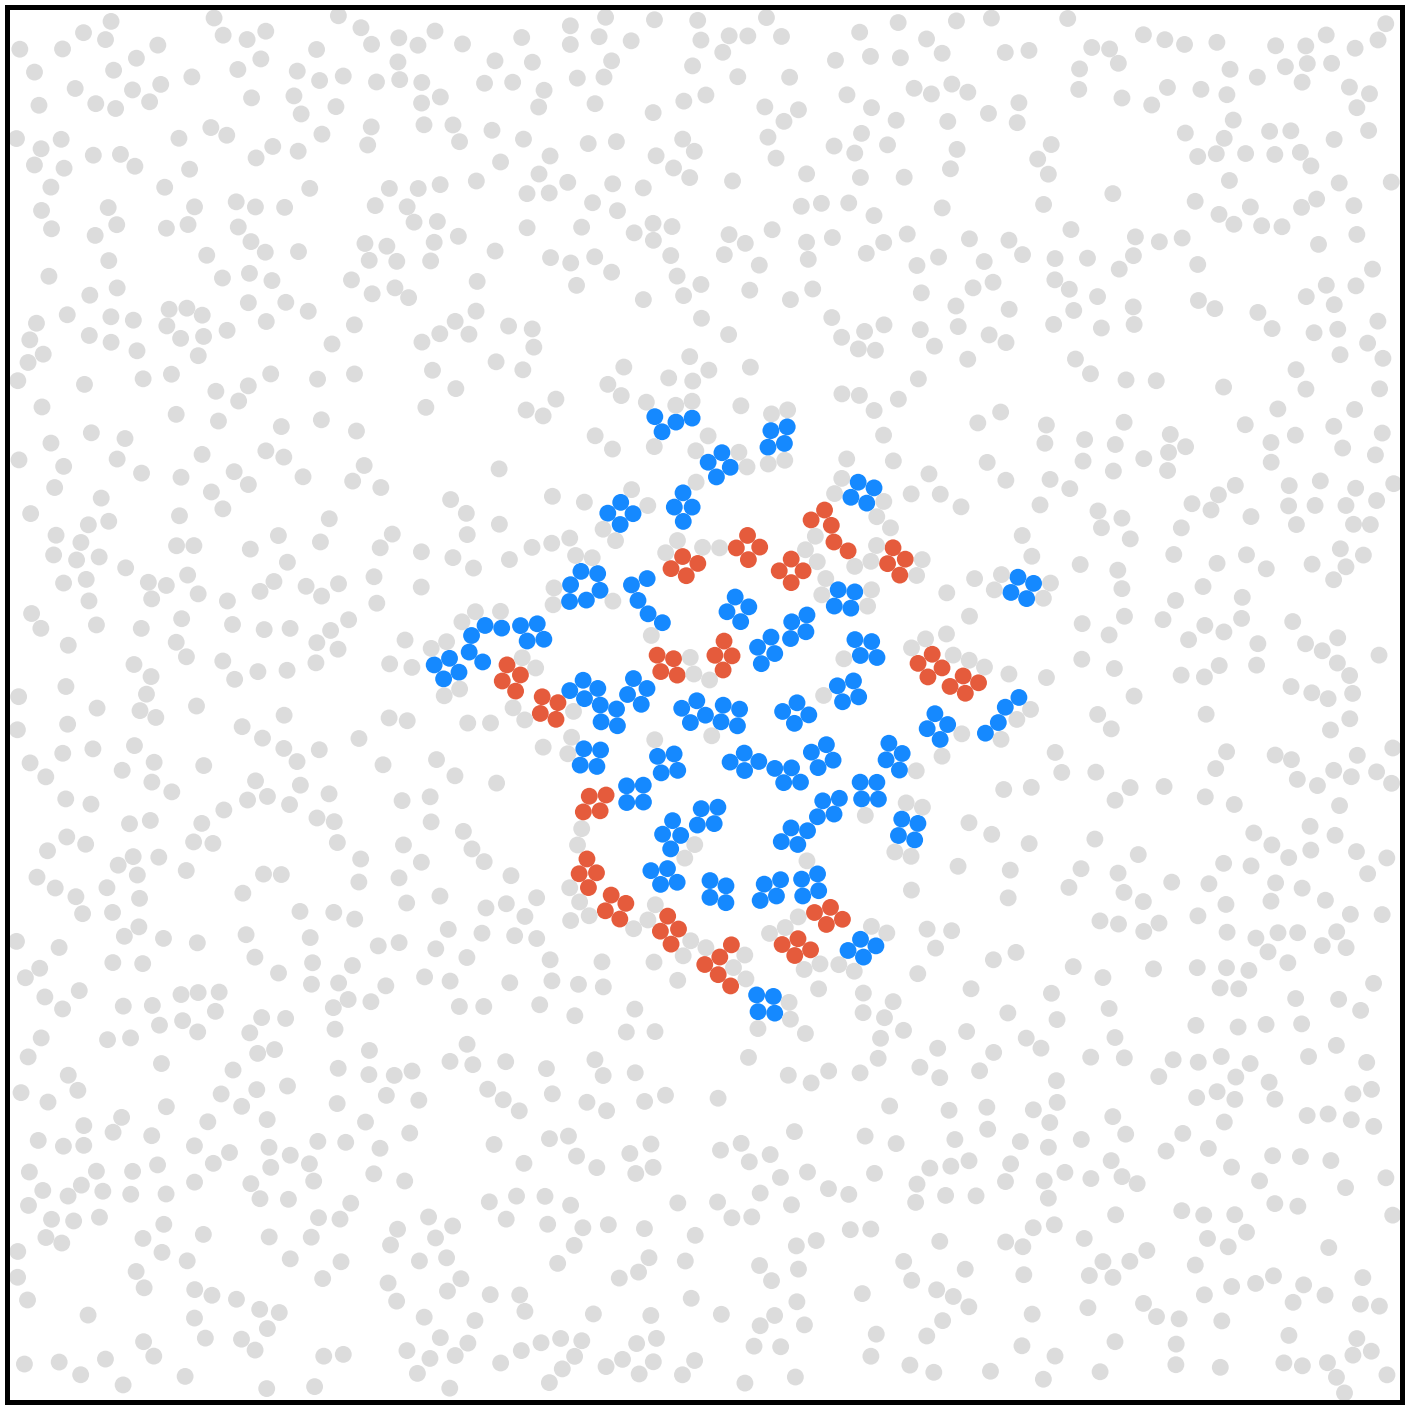

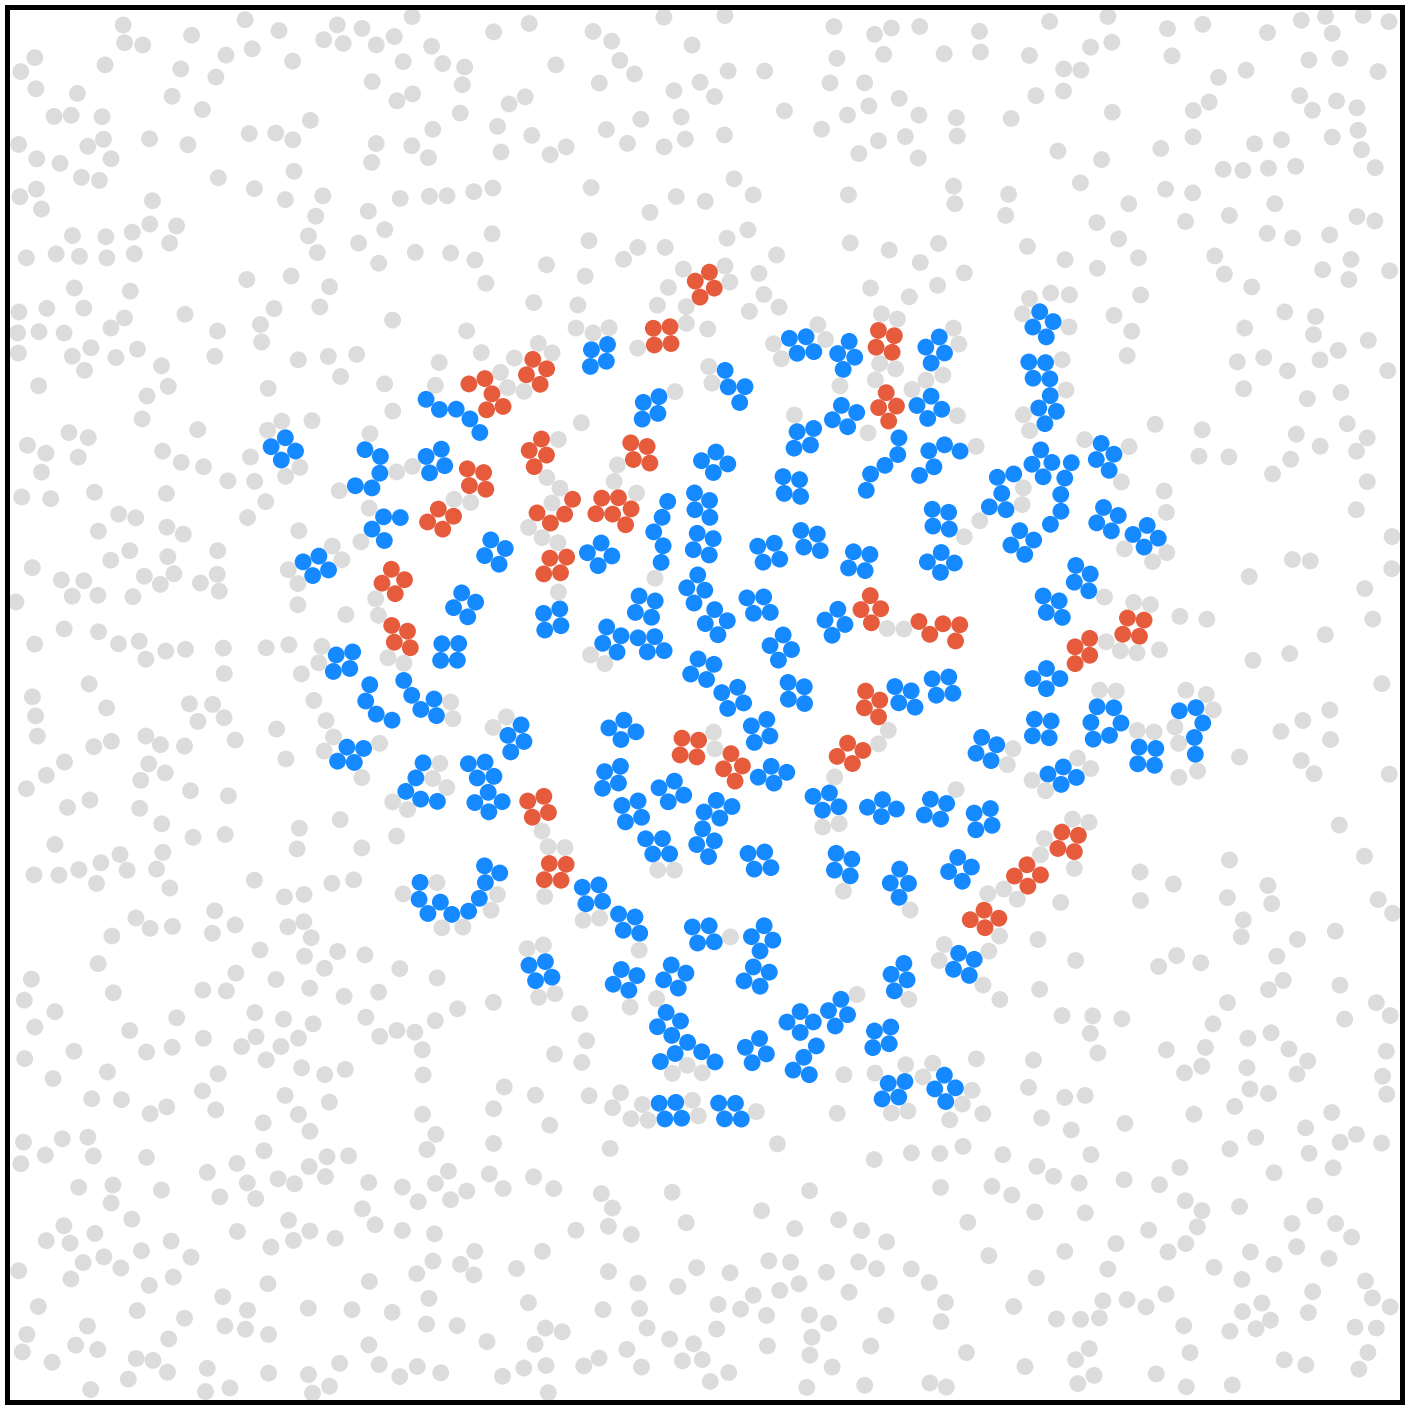

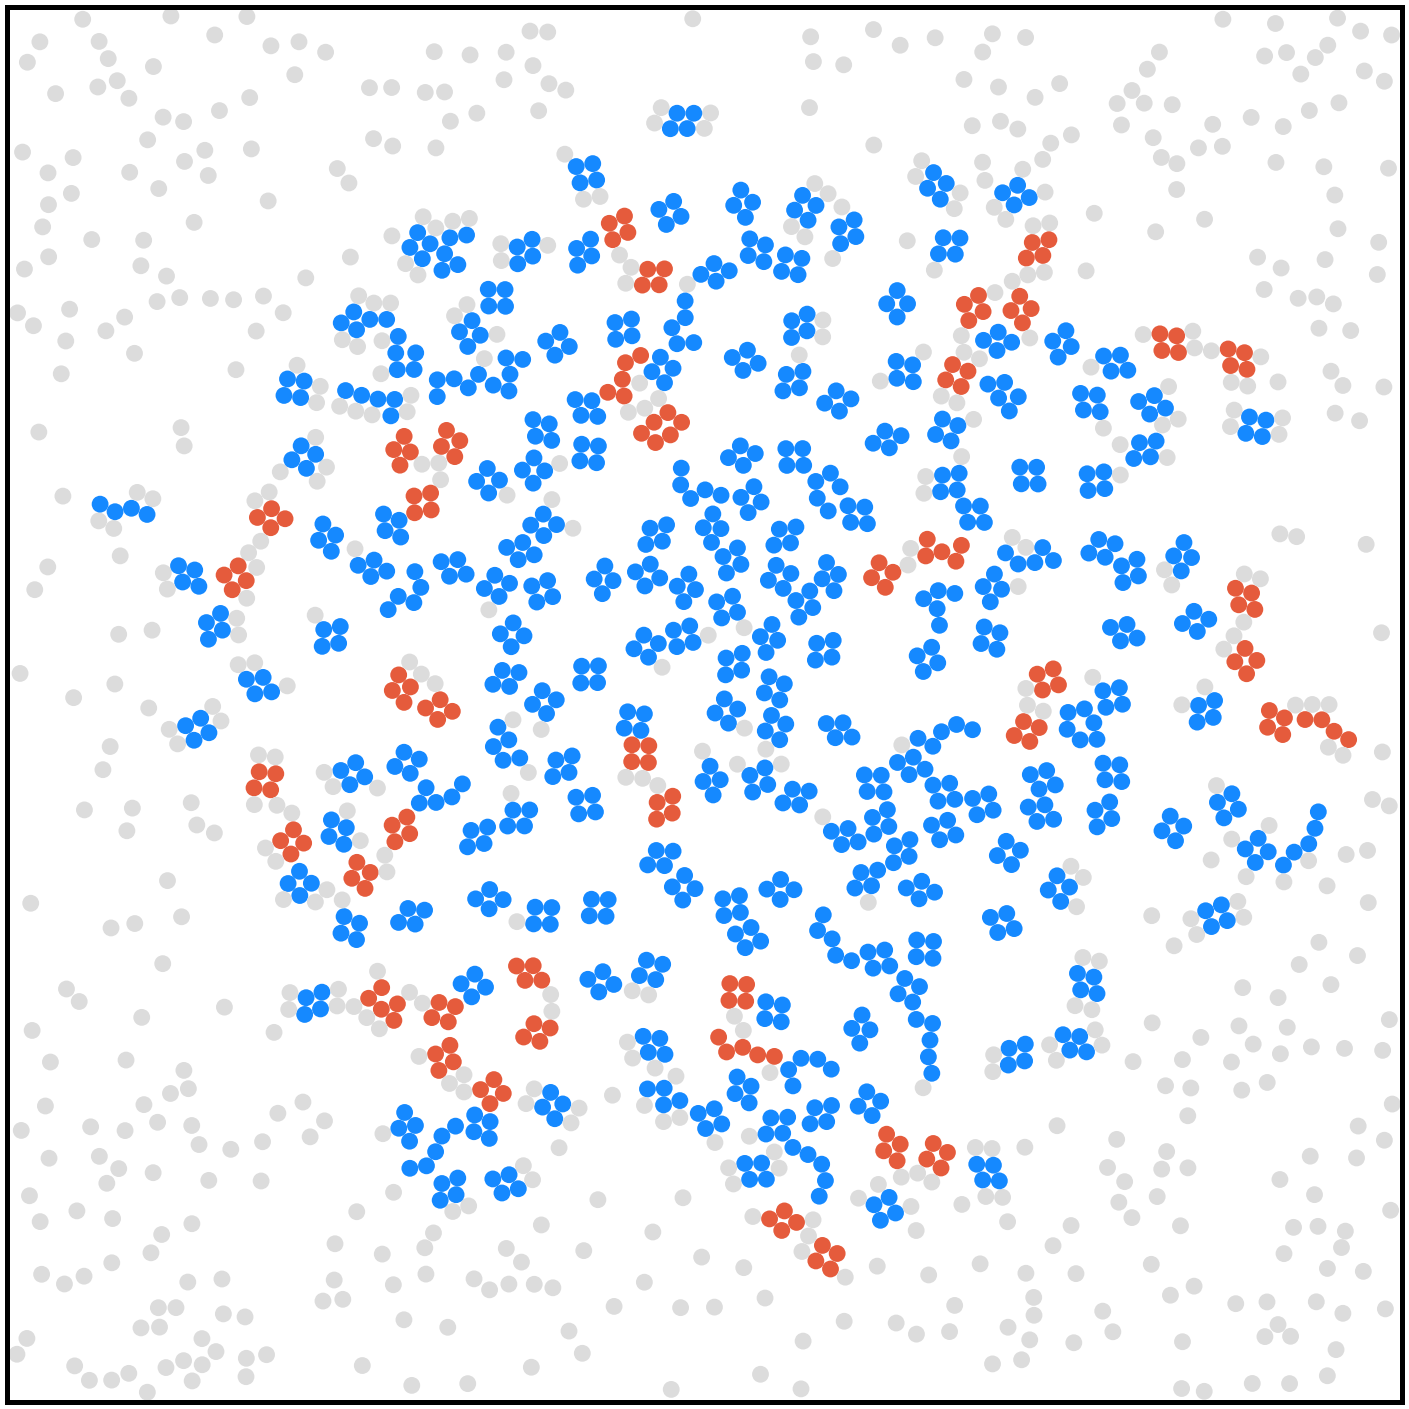

In [104]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]




# Set total number of particles
N=1652

# Input name of trajectory file
trajfile = '/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/trajNc3N1652L82MM10CM14Run2.dat'

# Calculate the length of a file
with open(trajfile) as f:
    len_trajfile = int(sum(1 for _ in f)/(N+2))

# Iterate over time
for time in np.arange(410,1911,500):
    # Import data file
    data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(8))
    data.columns=['PIN','SV','CA0','CA1','CA2','CIN','x','y']

    
    

    connect = np.empty(shape=(0,0))
    for i in range(1652):
        if data.iloc[i]['CIN']==-1 and data.iloc[i]['CA0']!=0 and data.iloc[i]['CA1']!=-1 :

            if data.iloc[ int(data.iloc[i]['CA0']) ]['CIN'] != data.iloc[ int(data.iloc[ int(data.iloc[i]['CA1']) ]['CA0']) ]['CIN']:
                connect = np.append(connect , data.iloc[ int(data.iloc[i]['CA0']) ]['CIN']) 
                connect = np.append(connect , data.iloc[ int(data.iloc[ int(data.iloc[i]['CA1']) ]['CA0']) ]['CIN'])

        if data.iloc[i]['CIN']==-1 and data.iloc[i]['CA0']!=0 and data.iloc[i]['CA2']!=-1 :
            if data.iloc[ int(data.iloc[i]['CA0']) ]['CIN'] != data.iloc[ int(data.iloc[ int(data.iloc[i]['CA2']) ]['CA0']) ]['CIN']:
                connect = np.append(connect, data.iloc[ int(data.iloc[i]['CA0']) ]['CIN']) 
                connect = np.append(connect, data.iloc[ int(data.iloc[ int(data.iloc[i]['CA2']) ]['CA0']) ]['CIN'])

    connected = f7(connect)

    
    
    # group datconnected = f7(connect)aframe by cluster identification number
    grouped=data.groupby(['CIN'])
    
    # Want to count number of attached monomers to the cluster
    # If any particle is connected to cluster, we set CA=1. otherwise CA=0
    data['CA0'][data['CA0']>=0]=1
    data['CA0'][data['CA0']<0] =0

    # Group monomers by cluster identification number. (Gather cluster members)
    grouped=data.groupby(['CIN'])

    # Calculate number of attached monomers to the cluster
    Num_attached_mono = grouped.aggregate(np.sum)['CA0']

    # If a cluster has less than 2 monomers attached, then plot them with blue color
    Num_attached_mono[Num_attached_mono<2] =0
    # If a cluster has more than 2 monomers attached, we plot them with full color
    Num_attached_mono[Num_attached_mono>=2]=5
    # We are setting this to be 5, to plot them with blue color
    Num_attached_mono[Num_attached_mono==0]=5
    # If monomer has attached monomer, we don't plot it
    Num_attached_mono[-1]=0
    Num_attached_mono[connected]=1
    figure(figsize=(25,25))
    # Set axis   
    ax = plt.subplot(111)   

    # Set line width of axes
    ax.spines["top"].set_linewidth(5)    
    ax.spines["bottom"].set_linewidth(5)    
    ax.spines["right"].set_linewidth(5)    
    ax.spines["left"].set_linewidth(5) 
    plt.axes()
    
    X = data['x']
    Y = data['y']
    area = np.pi * (90)
    plt.axes()
    plt.scatter(X, Y, s=area, c=(data['SV']*pd.DataFrame( np.array( Num_attached_mono[data['CIN']] ) )[0]).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#E55B3C').replace(3,'#E55B3C').replace(4,'#E55B3C').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF'), edgecolor='none',alpha= 1.0)
   
    plt.axis('tight')
    plt.xlim(-41.5, 41.5)
    plt.xticks(())
    plt.ylim(-41.5, 41.5)
    plt.yticks(())

    Num_attached_mono = grouped.aggregate(np.sum)['CA0']
    Num_attached_mono[Num_attached_mono<2] =0
    # If a cluster has more than 2 monomers attached, we plot them with full color
    Num_attached_mono[Num_attached_mono>=2]=1
    #plt.savefig('/Users/hidenori/Google Drive/Research/Replication/Figures/figure_3/figure_3_MM10CM14Run2_'+str(time)+'.pdf', bbox_inches='tight',format='pdf')
    #plt.close('all')

In [102]:
#Number of attached monomers
Num_attached_mono

CIN
-1     0
 0     1
 1     1
 2     1
 3     5
 4     1
 5     5
 6     1
 7     1
 8     1
 9     1
 10    1
 11    5
 12    1
 13    1
 14    1
 15    1
 16    5
 17    5
 18    1
 19    5
 20    1
Name: CA0, dtype: int64

In [72]:
# Set total number of particles
N=1652

# Input name of trajectory file
trajfile = '/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM14/trajNc3N1652L82MM10CM14Run2.dat'

# Calculate the length of a file
with open(trajfile) as f:
    len_trajfile = int(sum(1 for _ in f)/(N+2))

# Iterate over time
for time in np.arange(1010,1011,1):
    # Import data file
    data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(8))
    data.columns=['PIN','SV','CA0','CA1','CA2','CIN','x','y']

    # group dataframe by cluster identification number
    grouped=data.groupby(['CIN'])
data

PIN  SV   CA0   CA1   CA2  CIN          x          y
0        0   1    -1     1     3    0 -16.272273   1.832157
1        1   2   386     0     2    0 -15.384045   1.380233
2        2   1  1075     1     3    0 -16.052212   0.627478
3        3   2   283     0     2    0 -16.931663   1.086019
4        4   1    -1     5     7    1   3.151014  10.199355
5        5   2    -1     4     6    1   3.745920  11.005166
6        6   1    -1     5     7    1   4.743953  10.886807
7        7   2    -1     4     6    1   4.144375  10.092717
8        8   3    -1     9    11    2  -5.483218   2.224741
9        9   4    -1     8    10    2  -5.686931   3.200835
10      10   3    -1     9    11    2  -4.698741   3.047362
11      11   4    -1     8    10    2  -4.501530   2.067536
12      12   3    -1    13    15    3  -2.810906   0.530431
13      13   4    -1    12    14    3  -3.097412   1.483863
14      14   3    -1    13    15    3  -2.105081   1.602522
15      15   4    -1    12    14    3  -1.818915   0.643393
16      16   1    -1    -1    -1   -1  19.724281  -1.816921
17      17   3    -1   312  1289   11   7.635947   5.153086
18      18   0    -1    -1    -1   -1  17.788375 -28.150811
19      19   4    -1   567  1506   10   4.950288  -4.636481
20      20   0    -1    -1    -1   -1  17.669372  10.955919
21      21   0    -1    -1    -1   -1  32.213579  15.310439
22      22   4   280  1426   104   73 -10.784365  -9.598125
23      23   0    -1    -1    -1   -1 -10.100610  20.421448
24      24   0    -1    -1    -1   -1  34.848461  15.810165
25      25   2   986   816    -1   -1 -19.064696   4.150284
26      26   0    -1    -1    -1   -1 -11.376378 -26.635976
27      27   4   784    -1    -1   -1   6.962549  18.026262
28      28   0    -1    -1    -1   -1 -36.727024 -18.373786
29      29   2  1112   522   158   66  21.445661   3.166616
...    ...  ..   ...   ...   ...  ...        ...        ...
1622  1622   0    -1    -1    -1   -1 -39.169221  25.844170
1623  1623   0    -1    -1    -1   -1  28.489995  38.671023
1624  1624   0    -1    -1    -1   -1   5.129713  40.403135
1625  1625   4    -1   771  1587   69  15.106609   3.202360
1626  1626   0    -1    -1    -1   -1  40.725990  15.724121
1627  1627   0    -1    -1    -1   -1 -19.362348  39.567033
1628  1628   0    -1    -1    -1   -1 -17.901725  21.977450
1629  1629   4   343   456    -1   -1  16.486628  -6.203134
1630  1630   0    -1    -1    -1   -1   1.376335 -33.264688
1631  1631   3    -1  1289   312   11   8.296973   4.251036
1632  1632   0    -1    -1    -1   -1 -21.071285 -17.216437
1633  1633   0    -1    -1    -1   -1 -15.903656 -24.106115
1634  1634   0    -1    -1    -1   -1 -28.046110 -28.699759
1635  1635   0    -1    -1    -1   -1 -10.723028  33.322018
1636  1636   0    -1    -1    -1   -1 -39.835158  -7.317689
1637  1637   0    -1    -1    -1   -1  -6.000439 -19.220180
1638  1638   0    -1    -1    -1   -1  31.581800  25.371670
1639  1639   0    -1    -1    -1   -1 -26.411439 -28.466893
1640  1640   0    -1    -1    -1   -1 -38.421866  31.845980
1641  1641   0    -1    -1    -1   -1  29.955195   4.249383
1642  1642   0    -1    -1    -1   -1 -10.998230 -27.766935
1643  1643   0    -1    -1    -1   -1 -18.958447 -21.296807
1644  1644   0    -1    -1    -1   -1 -15.847795  33.270213
1645  1645   0    -1    -1    -1   -1 -13.393366  34.234398
1646  1646   2    -1    64   827   54  -4.824545  -9.703551
1647  1647   0    -1    -1    -1   -1  23.234307  21.451609
1648  1648   0    -1    -1    -1   -1 -16.557668 -40.942011
1649  1649   4    -1   498    -1   81   7.251150 -13.562371
1650  1650   2   558  1604    -1   -1   1.870740 -21.781022
1651  1651   0    -1    -1    -1   -1  38.324961  34.336584

[1652 rows x 8 columns]

In [56]:
data.iloc[1624]

PIN    1624.000000
SV        1.000000
CA0     941.000000
CA1     628.000000
CA2      -1.000000
CIN      -1.000000
x        16.103071
y       -26.367827
Name: 1624, dtype: float64

In [57]:
data.iloc[1624]['CIN']==-1

True

In [68]:
data.iloc[1624]['CA0']!=0
data.iloc[ int(data.iloc[1624]['CA0']) ]['CIN']

176.0

In [93]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]


connect = np.empty(shape=(0,0))
for i in range(1652):
    if data.iloc[i]['CIN']==-1 and data.iloc[i]['CA0']!=0 and data.iloc[i]['CA1']!=-1 :

        if data.iloc[ int(data.iloc[i]['CA0']) ]['CIN'] != data.iloc[ int(data.iloc[ int(data.iloc[i]['CA1']) ]['CA0']) ]['CIN']:
            connect = np.append(connect , data.iloc[ int(data.iloc[i]['CA0']) ]['CIN']) 
            connect = np.append(connect , data.iloc[ int(data.iloc[ int(data.iloc[i]['CA1']) ]['CA0']) ]['CIN'])

    if data.iloc[i]['CIN']==-1 and data.iloc[i]['CA0']!=0 and data.iloc[i]['CA2']!=-1 :
        if data.iloc[ int(data.iloc[i]['CA0']) ]['CIN'] != data.iloc[ int(data.iloc[ int(data.iloc[i]['CA2']) ]['CA0']) ]['CIN']:
            connect = np.append(connect, data.iloc[ int(data.iloc[i]['CA0']) ]['CIN']) 
            connect = np.append(connect, data.iloc[ int(data.iloc[ int(data.iloc[i]['CA2']) ]['CA0']) ]['CIN'])
            
connected = f7(connect)

In [109]:
connect

array([ 216.,  158.,   36.,  181.,    9.,   75.,   61.,   11.,  301.,
        246.,  206.,  294.,  226.,  288.,  239.,  122.,  225.,   22.,
        179.,  293.,   99.,  190.,  122.,  239.,  136.,  178.,  136.,
        279.,  246.,  301.,   11.,   61.,  218.,  182.,  302.,   34.,
        232.,  207.,   75.,    9.,  182.,  218.,  198.,  161.,   22.,
        225.,  158.,  216.,  138.,   34.,   74.,  104.,  204.,  277.,
        190.,   99.])

In [ ]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]




# Set total number of particles
N=3304

# Input name of trajectory file
trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/MutationL/trajNc3N3304L116MM10CM14Run0.dat'
  
# Calculate the length of a file
with open(trajfile) as f:
    len_trajfile = int(sum(1 for _ in f)/(N+2))

# Iterate over time
for time in np.arange(2196,3001,1):
    # Import data file
    data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(8))
    data.columns=['PIN','SV','CA0','CA1','CA2','CIN','x','y']

    
    

    connect = np.empty(shape=(0,0))
    for i in range(1652):
        if data.iloc[i]['CIN']==-1 and data.iloc[i]['CA0']!=-1 and data.iloc[i]['CA1']!=-1 :
            if data.iloc[ int(data.iloc[i]['CA0']) ]['CIN'] != data.iloc[ int(data.iloc[ int(data.iloc[i]['CA1']) ]['CA0']) ]['CIN']:
                if data.iloc[ int(data.iloc[ int(data.iloc[i]['CA1']) ]['CA0']) ]['CIN'] != -1:
                    connect = np.append(connect , data.iloc[ int(data.iloc[i]['CA0']) ]['CIN']) 
                    connect = np.append(connect , data.iloc[ int(data.iloc[ int(data.iloc[i]['CA1']) ]['CA0']) ]['CIN'])

        if data.iloc[i]['CIN']==-1 and data.iloc[i]['CA0']!=-1 and data.iloc[i]['CA2']!=-1 :
            if data.iloc[ int(data.iloc[i]['CA0']) ]['CIN'] != data.iloc[ int(data.iloc[ int(data.iloc[i]['CA2']) ]['CA0']) ]['CIN']:
                if data.iloc[ int(data.iloc[ int(data.iloc[i]['CA2']) ]['CA0']) ]['CIN'] != -1:
                    connect = np.append(connect, data.iloc[ int(data.iloc[i]['CA0']) ]['CIN']) 
                    connect = np.append(connect, data.iloc[ int(data.iloc[ int(data.iloc[i]['CA2']) ]['CA0']) ]['CIN'])

    connected = f7(connect)

    
    
    # group datconnected = f7(connect)aframe by cluster identification number
    grouped=data.groupby(['CIN'])
    
    # Want to count number of attached monomers to the cluster
    # If any particle is connected to cluster, we set CA=1. otherwise CA=0
    data['CA0'][data['CA0']>=0]=1
    data['CA0'][data['CA0']<0] =0

    # Group monomers by cluster identification number. (Gather cluster members)
    grouped=data.groupby(['CIN'])

    # Calculate number of attached monomers to the cluster
    Num_attached_mono = grouped.aggregate(np.sum)['CA0']

    # If a cluster has less than 2 monomers attached, then plot them with blue color
    Num_attached_mono[Num_attached_mono<2] =0
    # If a cluster has more than 2 monomers attached, we plot them with full color
    Num_attached_mono[Num_attached_mono>=2]=5
    # We are setting this to be 5, to plot them with blue color
    Num_attached_mono[Num_attached_mono==0]=5
    # If monomer has attached monomer, we don't plot it
    Num_attached_mono[-1]=0
    Num_attached_mono[connected]=1
    figure(figsize=(25,25))
    # Set axis   
    ax = plt.subplot(111)   

    # Set line width of axes
    ax.spines["top"].set_linewidth(5)    
    ax.spines["bottom"].set_linewidth(5)    
    ax.spines["right"].set_linewidth(5)    
    ax.spines["left"].set_linewidth(5) 
    plt.axes()
    
    X = data['x']
    Y = data['y']
    area = np.pi * (45)
    plt.axes()
    plt.scatter(X, Y, s=area, c=(data['SV']*pd.DataFrame( np.array( Num_attached_mono[data['CIN']] ) )[0]).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#E55B3C').replace(3,'#E55B3C').replace(4,'#E55B3C').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF'), edgecolor='none',alpha= 1.0)
   
    plt.axis('tight')
    plt.xlim(-58.5, 58.5)
    plt.xticks(())
    plt.ylim(-58.5, 58.5)
    plt.yticks(())

    #Num_attached_mono = grouped.aggregate(np.sum)['CA0']
    #Num_attached_mono[Num_attached_mono<2] =
    # If a cluster has more than 2 monomers attached, we plot them with full color
    #Num_attached_mono[Num_attached_mono>=2]=1
    #plt.savefig('/Users/hidenori/Research/connect/Image'+str(time)+'.png', bbox_inches='tight',format='png')
    #plt.close('all')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [119]:
Num_attached_mono

CIN
-1      0
 0      5
 1      1
 2      5
 3      1
 4      5
 5      5
 6      5
 7      5
 8      5
 9      5
 10     5
 11     1
 12     5
 13     5
 14     1
 15     5
 16     5
 17     5
 18     5
 19     5
 20     1
 21     1
 22     5
 23     5
 24     5
 25     5
 26     1
 27     5
 28     1
       ..
 183    5
 184    5
 185    5
 186    5
 187    5
 188    1
 189    5
 190    1
 191    5
 192    5
 193    5
 194    5
 195    5
 196    5
 197    5
 198    5
 199    5
 200    5
 201    5
 202    1
 203    5
 204    5
 205    5
 206    5
 207    5
 208    5
 209    5
 210    1
 211    5
 212    5
Name: CA0, dtype: int64

In [125]:
connect

array([ 130.,   61.,  139.,  148.,    1.,  163.,   61.,  130.,   21.,
          3.,  101.,    3.,   99.,  190.,  118.,   31.,    3.,  101.,
        178.,  136.,   26.,  182.,  148.,  139.,  202.,  104.,  112.,
        177.,  138.,   28.,   14.,  210.,   20.,   46.,   28.,  138.,
         35.,  159.,  108.,   11.,  188.,  116.,    3.,   21.,  136.,
        178.,  136.,  178.,  159.,   35.,  182.,   26.,  190.,   99.])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:
//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1082: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markeredgecolor != ec:


[ 79  85  91  97 104 112 120 128 138 147 158 169 181 194 208 223 239 257
 275 295 316 338 363 389 416]
[  5.51210007e-04  -3.39739767e+01]


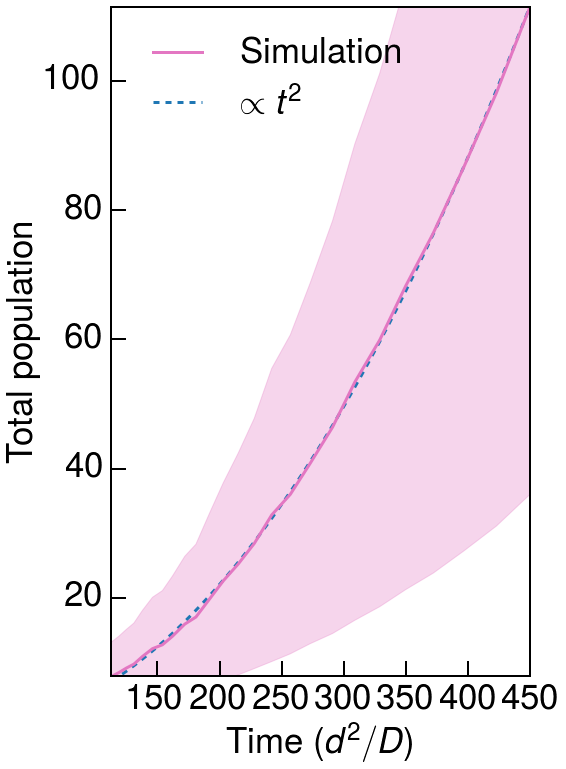

In [47]:
# total number of clusters at time "t" for ensemble "j"
NumCl=np.zeros([10,600])
i=0
# interate through the 10 independent ensembles 
for j in [0,2,3,5,6,8,9]:
    table = pd.read_table('/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM10/NumClNc3N1652L82MM10CM10Run'+str(j)+'.dat', sep='\t\t', index_col=1, header=None,names=['time','NPIC','Parents'],lineterminator='\n')
    # initially there is 5 clusters
    NCl = 5
    # We use simulation time
    table['time']=0.000002*table['time']
    # from 0 to 600, check number of clusters
    # If 
    for t in range(0, 600 ):
        # Shifted origin of time by (table['time'][10]-100)
        if t < table['time'][NCl+1] - (table['time'][15]-100) :
            NumCl[j][t] = NCl
        else:
            NCl+=1
            NumCl[j][t] = NCl


def func(x, a, b):
     return a*(x-b)**2
    
AveNumCl=np.average(NumCl, axis=0)

xdata = (10**np.arange(1.9,2.65,0.03)).astype(int) 
print(xdata)
ydata = AveNumCl[ xdata ]

popt, pcov = curve_fit(func, xdata, ydata)






# Set size of a figure
plt.figure(figsize=(7.5, 12))
ax = plt.subplot(111)   

# Set line width of axes
ax.spines["top"].set_linewidth(2)    
ax.spines["bottom"].set_linewidth(2)    
ax.spines["right"].set_linewidth(2)    
ax.spines["left"].set_linewidth(2) 

plt.tick_params(axis="both", which="both", bottom="on", top="off",    
labelbottom="on", left="on", right="off", labelleft="on",direction='in',length=15,width=2,pad=8,labelsize=35)

p1, = plt.plot(np.linspace(0,600,100)-popt[1],func( np.linspace(0,600,100) ,popt[0],popt[1]),lw=3.0,linestyle='--',color=tableau10[0],label=  r"$\propto t^2$")
p2, = plt.plot(xdata-popt[1],ydata,'ro' , marker='o',markersize=0, markeredgewidth=2, markerfacecolor=tableau10[6], markeredgecolor=tableau10[6] ,color=tableau10[6],lw=3,linestyle='-',label=  "Simulation")
ax.fill_between(xdata-popt[1], ydata + NumCl.std(axis=0)[ xdata ], ydata -  NumCl.std(axis=0)[ xdata ],color=tableau10[6], facecolor=tableau10[6], alpha=0.3)

print( popt )

plt.xlim(xdata.min()-popt[1],xdata.max()-popt[1])
plt.ylim(ydata.min(),ydata.max())
plt.xlabel(r'Time ($d^2/D$)',fontsize=35)
plt.ylabel('Total population',fontsize=35)
plt.legend([p2,p1],["Simulation",r"$\propto t^2$"],prop={'size':35},loc=2,markerscale=2, numpoints=2).get_frame().set_alpha(0.0)
#plt.savefig('/Users/hidenori/Google Drive/Research/Replication/Figures/figure_4/figure_4a.pdf', bbox_inches='tight',format='pdf'

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1082: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markeredgecolor != ec:


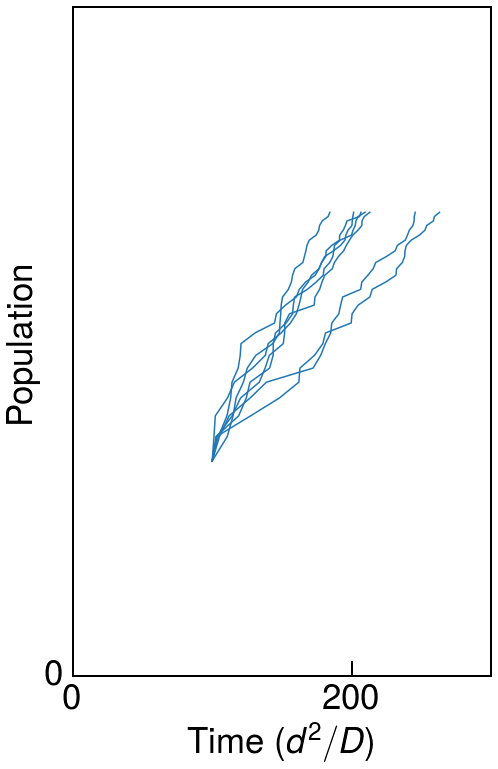

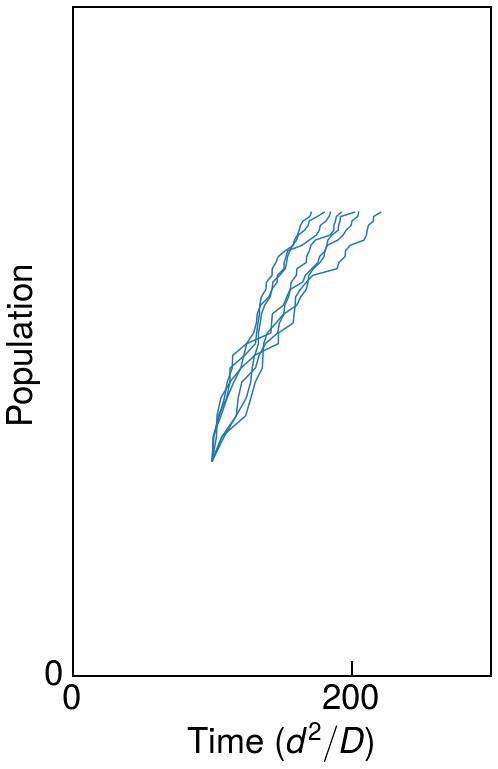

In [81]:
for j in [2,4]:
    # Set size of a figure
    plt.figure(figsize=(7.5, 12)) 

    # Set axis   
    ax = plt.subplot(111)   
    ax.spines["top"].set_linewidth(2)    
    ax.spines["bottom"].set_linewidth(2)    
    ax.spines["right"].set_linewidth(2)    
    ax.spines["left"].set_linewidth(2) 
    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot. 
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.yticks(range(0, 1001, 100), [str(x) for x in range(0, 1001, 100)], fontsize=35)    
    plt.xticks(range(0,601,200),[str(x) for x in np.arange(0,601,200) ], fontsize=35) 

    plt.tick_params(axis="both", which="both", bottom="on", top="off",    
    labelbottom="on", left="on", right="off", labelleft="on",direction='in',length=15,width=2,pad=8,labelsize=35)

    for i in [0,2,3,5,6,8,9]:
        table = pd.read_table('/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM1'+str(j)+'/NumClNc3N1652L82MM10CM1'+str(j)+'Run'+str(i)+'.dat', sep='\t\t', index_col=1, header=None,names=['time','NPIC','Parents'],lineterminator='\n')
        hi=table.groupby(['NPIC'])
        table['time']=table['time']*0.000002 
        plt.plot( table['time'][2:30]-table['time'][7]+100, np.log( DataFrame( np.arange(5,5+len( pd.DataFrame( table['time'][2:30] )) )) ) , marker='o',markersize=0, markeredgewidth=1.5,markeredgecolor=tableau10[0] ,lw=1.5,linestyle='-',markerfacecolor="w",color=tableau10[0],alpha=1.0,label= r"4-mer")   #$E_{\rm{bm}}/T$ = "+str(round(7*j/10,3)))

    plt.xlabel(r'Time ($d^2/D$)',fontsize=35)
    plt.ylabel('Population',fontsize=35)
    plt.xlim(0,300)
    plt.ylim(0,5)
    #plt.legend(prop={'size':35},loc=2,markerscale=2, numpoints=1).get_frame().set_linewidth(0.0)
    #plt.savefig('/Users/hidenori/Google Drive/Research/Replication/Figures/figure_2a.pdf', bbox_inches='tight',format='pdf')

In [49]:
Cluster=np.zeros([10,5000,59])
# define function for periodic boundary condition
def PB_Data(x,L):
    return x-((x/(2*L)).round(0))*2*L

# half length of a box
L=41.
COM_Cluster = np.zeros(2)
# total number of particles
N=1652
for i in range(10):
    # a file to look at
    trajfile =  '/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM12/trajNc3N1652L82MM10CM12Run'+str(i)+'.dat'
    table = pd.read_table('/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM12/NumClNc3N1652L82MM10CM12Run'+str(i)+'.dat', sep='\t\t', index_col=1, header=None,names=['time','NPIC','Parents'],lineterminator='\n')
    # Calculate the length of a file
    with open(trajfile) as f:
        len_trajfile = int(sum(1 for _ in f)/(N+2))
    # time step we are interested in
    for time in range( int(table['time'][10]/10**5), int(table['time'][10]/10**5)+2700, 100):
        data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(8))
        data.columns=['PIN','SV','CA0','CA1','CA2','CIN','x','y']
        # Calculate center of mass of cluster
        Cluster_configuration=data.groupby(['CIN']).mean()
        # Calculate center of mass considering periodic boundary condition
        COM_Cluster=[ ( COM_Cluster[0] + PB_Data(Cluster_configuration['x'].iloc[1:] - COM_Cluster[0],L)).mean(), (COM_Cluster[1]+PB_Data(Cluster_configuration['y'].iloc[1:]-COM_Cluster[1],L)).mean()]
        #print( COM_Cluster )


        Cluster_radial_dist=sqrt(( PB_Data(Cluster_configuration['x'].iloc[1:]-COM_Cluster[0],L) )**2+( PB_Data(Cluster_configuration['y'].iloc[1:]-COM_Cluster[1],L) )**2).round(0)
        Cluster_radial_hist=Cluster_radial_dist.value_counts()


        for j in Cluster_radial_hist.index:
            if j!= 0:
                Cluster[i][time-int(table['time'][10]/10**5)][j]= float(Cluster_radial_hist[j])/( np.pi*( (float(j)+0.5)**2 - (float(j)-0.5)**2 ) )
            elif j==0:
                Cluster[i][time-int(table['time'][10]/10**5)][j]= float(Cluster_radial_hist[j])/( np.pi*( (float(j)+0.5)**2 ) )

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:35: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:37: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1.39218045113


//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:
//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1082: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markeredgecolor != ec:


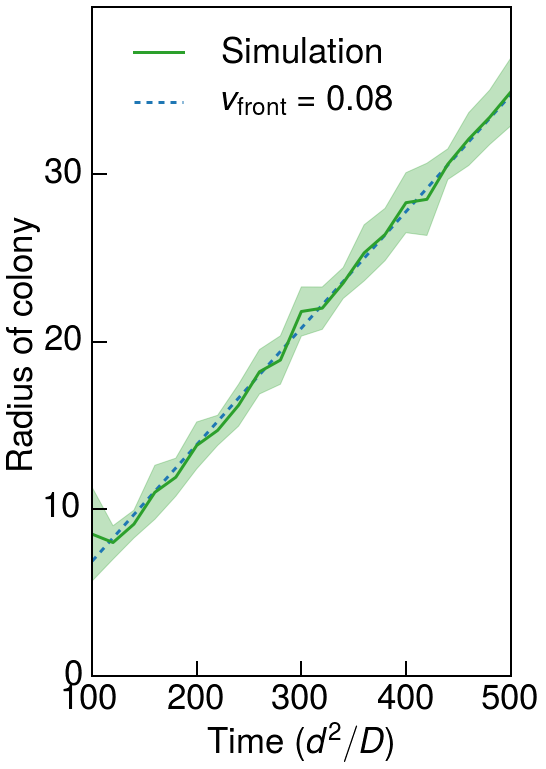

In [50]:
# Set size of a figure
# Common sizes: (10, 7.5) and (12, 9)    
#plt.figure(figsize=(10, 7.5))    
plt.figure(figsize=(7.5,12)) 
    
# Set axis   
ax = plt.subplot(111)   

# Set line width of axes
ax.spines["top"].set_linewidth(2)    
ax.spines["bottom"].set_linewidth(2)    
ax.spines["right"].set_linewidth(2)    
ax.spines["left"].set_linewidth(2) 
Front=np.zeros([10,30])


# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot. 
plt.yticks(range(0, 40,10), [str(x) for x in range(0, 40,10)], fontsize=35)    
plt.xticks(range(0,30,5),[str(x) for x in range(100,700,100)], fontsize=35) 
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
labelbottom="on", left="on", right="off", labelleft="on",direction='in',length=15,width=2,pad=8,labelsize=35)

k=0
for i in range(10):
    k=0
    for time in range(0,2700,100):
        Cluster_total=np.zeros(59)
        for j in range(1):
            Cluster_total+=Cluster[i,time+j]
        Cluster_total[Cluster_total>0.020]=1
        Cluster_total[Cluster_total<1]=0
        Front[i,k]=np.argwhere(Cluster_total==1)[-1]
        k+=1
  
z = np.polyfit( np.arange(0,20) , np.average(Front, axis=0)[0:20] , 1)
xx=np.linspace(0,50,100)
yy=z[0]*xx+z[1]
print(z[0])

p1, = plt.plot(xx,yy,lw=3.0,linestyle='--', color=tableau10[0])


p2, = plt.plot(np.average(Front, axis=0) , marker='o',markersize=0, markeredgewidth=0,markeredgecolor=tableau10[i] ,lw=3.0,linestyle='-',markerfacecolor=tableau10[2],color=tableau10[2],alpha=1.0)
ax.fill_between(np.arange(0,30),np.average(Front, axis=0)-Front.std(axis=0),np.average(Front, axis=0)+Front.std(axis=0),color=tableau10[2], facecolor=tableau10[2], alpha=0.3)



plt.xlabel(r'Time ($d^2/D$)',fontsize=35)
plt.ylabel('Radius of colony',fontsize=35)    
plt.ylim(0,40)
plt.xlim(0,20)
plt.legend([p2,p1],["Simulation",r"$v_{\rm{front}}=0.08$"],prop={'size':35},loc=2,markerscale=2, numpoints=2).get_frame().set_alpha(0.0)
#plt.savefig('/Users/hidenori/Google Drive/Research/Replication/Figures/figure_4/figure_4b.pdf', bbox_inches='tight',format='pdf')

In [76]:
table['time'][2:40]

7      30.4144
8      37.4152
9      47.6866
10     49.0520
11     51.6206
12     61.3944
13     64.0560
14     68.5176
15     77.3466
16     78.5790
17     82.0492
18     91.0864
19     93.8236
20     97.8504
21     99.0744
22     99.7056
23    102.8852
24    107.7326
25    110.6028
26    111.1472
27    112.9364
28    120.4942
29    124.2632
30    126.4354
31    129.9668
32    130.6040
33    134.7144
34    135.3902
35    137.7854
36    138.1608
37    138.2736
38    140.2884
39    141.4322
40    143.8448
41    144.7950
42    146.0982
43    147.5154
44    147.5260
Name: time, dtype: float64

In [60]:
[0,2,3,5,6,8,9]

0.06999999999999999

In [82]:
Cluster=np.zeros([10,5000,59])
# define function for periodic boundary condition
def PB_Data(x,L):
    return x-((x/(2*L)).round(0))*2*L

# half length of a box
L=41.
COM_Cluster = np.zeros(2)
# total number of particles
N=1652
for i in [0,2,3,5,6,8,9]:
    # a file to look at
    trajfile =  '/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM10/trajNc3N1652L82MM10CM10Run'+str(i)+'.dat'
    table = pd.read_table('/Users/hidenori/Research/RCdata/Repli/04_25_2016_Nc3Ini4_N1652/MM10CM10/NumClNc3N1652L82MM10CM10Run'+str(i)+'.dat', sep='\t\t', index_col=1, header=None,names=['time','NPIC','Parents'],lineterminator='\n')
    # Calculate the length of a file
    with open(trajfile) as f:
        len_trajfile = int(sum(1 for _ in f)/(N+2))
    # time step we are interested in
    for time in range( int(table['time'][10]/10**5), int(table['time'][10]/10**5)+2700, 100):
        data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(8))
        data.columns=['PIN','SV','CA0','CA1','CA2','CIN','x','y']
        # Calculate center of mass of cluster
        Cluster_configuration=data.groupby(['CIN']).mean()
        # Calculate center of mass considering periodic boundary condition
        COM_Cluster=[ ( COM_Cluster[0] + PB_Data(Cluster_configuration['x'].iloc[1:] - COM_Cluster[0],L)).mean(), (COM_Cluster[1]+PB_Data(Cluster_configuration['y'].iloc[1:]-COM_Cluster[1],L)).mean()]
        #print( COM_Cluster )


        Cluster_radial_dist=sqrt(( PB_Data(Cluster_configuration['x'].iloc[1:]-COM_Cluster[0],L) )**2+( PB_Data(Cluster_configuration['y'].iloc[1:]-COM_Cluster[1],L) )**2).round(0)
        Cluster_radial_hist=Cluster_radial_dist.value_counts()


        for j in Cluster_radial_hist.index:
            if j!= 0:
                Cluster[i][time-int(table['time'][10]/10**5)][j]= float(Cluster_radial_hist[j])/( np.pi*( (float(j)+0.5)**2 - (float(j)-0.5)**2 ) )
            elif j==0:
                Cluster[i][time-int(table['time'][10]/10**5)][j]= float(Cluster_radial_hist[j])/( np.pi*( (float(j)+0.5)**2 ) )

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:35: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:37: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [ ]:
# Set size of a figure
# Common sizes: (10, 7.5) and (12, 9)    
#plt.figure(figsize=(10, 7.5))    
plt.figure(figsize=(7.5,12)) 
    
# Set axis   
ax = plt.subplot(111)   

# Set line width of axes
ax.spines["top"].set_linewidth(2)    
ax.spines["bottom"].set_linewidth(2)    
ax.spines["right"].set_linewidth(2)    
ax.spines["left"].set_linewidth(2) 
Front=np.zeros([10,30])


# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot. 
plt.yticks(range(0, 40,10), [str(x) for x in range(0, 40,10)], fontsize=35)    
plt.xticks(range(0,30,5),[str(x) for x in range(100,700,100)], fontsize=35) 
plt.tick_params(axis="both", which="both", bottom="on", top="off",    
labelbottom="on", left="on", right="off", labelleft="on",direction='in',length=15,width=2,pad=8,labelsize=35)

k=0
for i in range(10):
    k=0
    for time in range(0,2700,100):
        Cluster_total=np.zeros(59)
        for j in range(1):
            Cluster_total+=Cluster[i,time+j]
        Cluster_total[Cluster_total>0.020]=1
        Cluster_total[Cluster_total<1]=0
        Front[i,k]=np.argwhere(Cluster_total==1)[-1]
        k+=1
  
z = np.polyfit( np.arange(0,20) , np.average(Front, axis=0)[0:20] , 1)
xx=np.linspace(0,50,100)
yy=z[0]*xx+z[1]
print(z[0])

p1, = plt.plot(xx,yy,lw=3.0,linestyle='--', color=tableau10[0])


p2, = plt.plot(np.average(Front, axis=0) , marker='o',markersize=0, markeredgewidth=0,markeredgecolor=tableau10[i] ,lw=3.0,linestyle='-',markerfacecolor=tableau10[2],color=tableau10[2],alpha=1.0)
ax.fill_between(np.arange(0,30),np.average(Front, axis=0)-Front.std(axis=0),np.average(Front, axis=0)+Front.std(axis=0),color=tableau10[2], facecolor=tableau10[2], alpha=0.3)



plt.xlabel(r'Time ($d^2/D$)',fontsize=35)
plt.ylabel('Radius of colony',fontsize=35)    
plt.ylim(0,40)
plt.xlim(0,20)
plt.legend([p2,p1],["Simulation",r"$v_{\rm{front}}=0.08$"],prop={'size':35},loc=2,markerscale=2, numpoints=2).get_frame().set_alpha(0.0)
#plt.savefig('/Users/hidenori/Google Drive/Research/Replication/Figures/figure_4/figure_4b.pdf', bbox_inches='tight',format='pdf')

In [ ]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]




# Set total number of particles
N=1652

for k in range(0,1):
    # Input name of trajectory file
    #trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Mutation/Mutation/trajNc3N1652L82MM10CM14Run'+str(k)+'.dat'
    #trajfile = '/Users/hidenori/Research/RCdata/Repli/06_02_Mutation/Mu_trajNc3N1652L82MM10CM14Run'+str(k)+'.dat'
    #trajfile = '/Users/hidenori/Google Drive/Research/Replication/Code/Mutation/Mutation_Load/Mu_trajNcN1652L82MM10CM14Run4.dat'
    #trajfile = '/Users/hidenori/Research/RCdata/Repli/06_02_Mutation/Mu_trajNc3N1652L82MM10CM14Run'+str(k)+'.dat'
    # Calculate the length of a file
    trajfile='/Users/hidenori/Google Drive/Mutation/Mu_trajNc3N1652L82MM10CM14Run'+str(k)+'.dat'
    with open(trajfile) as f:
        len_trajfile = int(sum(1 for _ in f)/(N+2))
    print(len_trajfile)
    # Iterate over time
    #len_trajfile=1001
    time=0
    # Import data file
    data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(9))
    data.columns=['PIN','SV','CA0','CA1','CA2','CIN','Nc','x','y']

    # group dataframe by cluster identification number
    grouped=data.groupby(['CIN'])
    datanew=data


    trackPIN=pd.DataFrame(np.zeros(1652))
    for iniclust in range(0,101):
        trackPIN=pd.DataFrame(np.zeros(1652))
        #iniclust = 41
        trackCIN=np.zeros(400)
        trackCIN[iniclust]=1
        trackPIN.iloc[ data[data['CIN']==iniclust]['PIN'] ]=1












        for time in np.arange( 0, 1,1):#len_trajfile-1,len_trajfile,1):
            # Import data file
            data = pd.read_table(trajfile,skiprows= 2 + (N+2)*time,header = None,nrows=N,usecols=range(9))
            data.columns=['PIN','SV','CA0','CA1','CA2','CIN','Nc','x','y']

            # group dataframe by cluster identification number
            grouped=data.groupby(['CIN'])


            dataold=datanew
            datanew=data

            detectnew=datanew['CIN']-dataold['CIN']
            kids=f7(datanew['CIN'][ detectnew[detectnew>0].index ]) 
            for kid in kids:
                #print("kid",kid)
                parents=np.array( f7(dataold['CIN'][dataold[datanew['CIN']==kid]['CA0']]) )
                parents=parents[np.isfinite(parents)]
                #print("parent",parents)
                if trackCIN[parents.astype(int) ].sum()>0:
                    trackPIN.iloc[ data[data['CIN']==kid]['PIN'] ]=1
                    trackCIN[kid]=1

            # Want to count number of attached monomers to the cluster
            # If any particle is connected to cluster, we set CA=1. otherwise CA=0
            #data['CA0'][data['CA0']>=0]=1
            #data['CA0'][data['CA0']<0] =0

            # Group monomers by cluster identification number. (Gather cluster members)
            grouped=data.groupby(['CIN'])

            # Calculate number of attached monomers to the cluster
            Num_attached_mono = grouped.aggregate(np.sum)['CA0']

            # If a cluster has less than 2 monomers attached, then plot them with blue color
            Num_attached_mono[Num_attached_mono<2] =0
            # If a cluster has more than 2 monomers attached, we plot them with full color
            Num_attached_mono[Num_attached_mono>=2]=1
            # We are setting this to be 5, to plot them with blue color
            Num_attached_mono[Num_attached_mono==0]=5
            # If monomer has attached monomer, we don't plot it
            Num_attached_mono[-1]=0
            if np.mod( time ,250 )==0:    
                figure(figsize=(25,25))
                # Set axis   
                ax = plt.subplot(111)   

                # Set line width of axes
                ax.spines["top"].set_linewidth(5)    
                ax.spines["bottom"].set_linewidth(5)    
                ax.spines["right"].set_linewidth(5)    
                ax.spines["left"].set_linewidth(5) 
                plt.axes()

                X = data['x']
                Y = data['y']
                area = np.pi * (90)
                plt.axes()


                # * pd.DataFrame( np.array( Num_attached_mono[data['CIN']] ) )[0]

                plt.scatter(X, Y, s=area, c=(data['Nc']*(trackPIN[0]+1)).replace(0,'#DCDCDC').replace(3,'#4CC417').replace(4,'#FF7F50').replace(6,'#FF69B4').replace(8,'#FF69B4'), edgecolor='none',alpha= 1.0)


                #plt.scatter(X, Y, s=area, c=(data['Nc']).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#E55B3C').replace(3,'#E55B3C').replace(4,'#4CC417').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF').replace(25,'#4CC417').replace(50,'#4CC417').replace(75,'#4CC417').replace(100,'#4CC417'), edgecolor='none',alpha= 1.0)
                #plt.scatter(X, Y, s=area, c=(data['Nc']* pd.DataFrame( np.array( Num_attached_mono[data['CIN']] ) )[0] ).replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#E55B3C').replace(3,'#E55B3C').replace(4,'#4CC417').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF').replace(25,'#4CC417').replace(50,'#4CC417').replace(75,'#4CC417').replace(100,'#4CC417'), edgecolor='none',alpha= 1.0)
                #plt.scatter(X, Y, s=area, c=(data['Nc']).replace(0,'#DCDCDC').replace(1,'#4CC417').replace(2,'#4CC417').replace(3,'#4CC417').replace(4,'#4CC417').replace(5,'#1589FF').replace(10,'#1589FF').replace(15,'#1589FF').replace(20,'#1589FF').replace(25,'#4CC417').replace(50,'#4CC417').replace(75,'#4CC417').replace(100,'#4CC417'), edgecolor='none',alpha= 1.0)
                #.replace(0,'#DCDCDC').replace(1,'#E55B3C').replace(2,'#1589FF').replace(3,'#FF7F50').replace(4,'#4CC417')

                plt.axis('tight')
                plt.xlim(-41.5, 41.5)
                plt.xticks(())
                plt.ylim(-41.5, 41.5)
                plt.yticks(())
                plt.title(iniclust,fontsize=50)
                Num_attached_mono = grouped.aggregate(np.sum)['CA0']
                Num_attached_mono[Num_attached_mono<2] =0
                
                # If a cluster has more than 2 monomers attached, we plot them with full color
                Num_attached_mono[Num_attached_mono>=2]=1
                #plt.savefig('/Users/hidenori/Dropbox/2DReplication/MutationImages/Lineage'+str(k)+'-'+str(time)+'.pdf', bbox_inches='tight',format='pdf')
                #plt.close('all')